# Probability Theory
<a id="top"></a>
[STAT 414/415 Penn State University](https://onlinecourses.science.psu.edu/stat414/node/3)

In [50]:
library(ggplot2)
library(tidyverse)

# Section 1

Section 1 Goals:

* Apply basic probability theory to categorical data.
* Perform a Monte Carlo simulation to approximate the results of repeating an experiment over and over, including simulating the outcomes in the Monty Hall problem.
* Distinguish between: sampling with and without replacement, events that are and are not independent, and combinations and permutations.
* Apply the multiplication and addition rules, as appropriate, to calculate the probably of multiple events occurring.
* Use `sapply` instead of a for loop to perform element-wise operations on a function.

<a id="1a"></a>
### <font color = "INDIGO">Introduction to Discrete Probability</font>

Start with covering some basic principles related to **categorical data**. This subset of probability is referred to as **discrete probability**. It will help us understand the probability theory we will later introduce for numeric and continuous data, which is more common in data science applications.

Discrete probability is more useful in card games and we use these as examples. The word probability is used in everyday language. For example, Google's auto complete of, what are the chances of, gives us getting pregnant, having twins, and rain tomorrow. Answering questions about probability is often hard, if not impossible.

Here, we discuss a mathematical definition of probability that does permit us to give precise answers to certain questions. For example, if I have two red beads and three blue beads inside an urn and I pick one at random, what is the probability of picking a red one?

Our intuition tells us that the answer is 2/5, or 40%. A precise definition can be given by noting that there are five possible outcomes of which two satisfy the condition necessary for the event "pick a red bead."

Because each of the five outcomes has the same chance of occurring, we conclude that the probability is 0.4 for red and 0.6 for blue. A more tangible way to think about **the probability of an event is as a proportion of times the event occurs when we repeat the experiment over and over independently and under the same conditions**.

Before we continue, let's introduce some notation. 

We use the notation $Pr(A)$ probability of A to denote the probability of an event A happening.

We use the very general term **event** to refer to things that can happen when something happens by chance. For example, in our previous example, the event was picking a red bead. In a political poll, in which we call 100 likely voters at random, an example of an event is calling 48 Democrats and 52 Republicans. 

In data science applications, we will often deal with **continuous variables**. In these cases, events will often be things like, is this person taller than 6 feet? In this case, we write events in a more mathematical form. For example, x greater than 6. We'll see more of these examples later. Here, we focus on categorical data and discrete probability.


#### Monte Carlo Simulations
https://en.wikipedia.org/wiki/Monte_Carlo_method  
https://www.riskamp.com/files/RiskAMP%20-%20Monte%20Carlo%20Simulation.pdf



Computers provide a way to actually perform the simple random experiments, such as the one we did before. Pick a beat at random from a bag or an urn with 3 blue beads and 2 red ones. Random number generators permit us to mimic the process of picking at random.

An example in R is the `sample()` function. We demonstrate its use showing you some code. First, use the rep function to generate the urn. We create an urn with 2 red and 3 blues. You can see when we type beads we see this.

Now, we can use a sample function to pick one at random. If we type sample beads comma 1, in this case, we get a blue. This line of code produces one random outcome. Now, we want to repeat this experiment over and over. However, it is, of course, impossible to repeat forever. Instead, we repeat the experiment a large enough number of times to make the results practically equivalent to doing it over and over forever.

In [464]:
beads <- rep(c("red", "blue"), times = c(2,3))

print(beads)

sample(beads, 1)

[1] "red"  "red"  "blue" "blue" "blue"


[1] "blue"

This is an example of a Monte **Carlo simulation**. Note that much of what mathematical and theoretical statisticians study-- something we do not cover in this course-- relates to providing rigorous definitions of practically equivalent, as well as studying how close a large number of experiment gets us to what happens in the limit, the limit meaning if we did it forever.

Later in this module, we provide a practical approach to deciding what is large enough. To perform our first **Monte Carlo simulation**, we use the `replicate()` function. This permits us to repeat the same task any number of times we want. Here, we repeat the random event 10,000 times. We set B to be 10,000, then we use the replicate function to sample from the beads 10,000 times. 



In [7]:
B <- 10000

events <- replicate(B, sample(beads, 1))

We can now see if, in fact, our definition is in agreement with this Monte Carlo simulation approximation. We can use table, for example, to see the distribution. And then we can use prop.table to give us the proportions. And we see that, in fact, the Monte Carlo simulation gives a very good approximation with 0.5962 for blue and 0.4038 for red. We didn't get exactly 0.6 and exactly 0.4, but statistical theory tells us that, if we make B large enough, we can get as close as we want to those numbers.

In [13]:
tab <- table(events)
tab

prop.table(tab)

events
blue  red 
6057 3943 

events
  blue    red 
0.6057 0.3943 

We just covered a simple and not very useful example of Monte Carlo simulations. But we will use Monte Carlo simulation to estimate probabilities in cases in which it is harder to compute the exact ones. Before we go into more complex examples, we still use simple ones to demonstrate the computing tools available in R. Let's start by noting that we don't actually have to use `replicate()` in this particular example. This is because the function sample has an argument that permits us to pick more than one element from the urn. However, by default, this selection occurs without replacement. After a bead is selected, it is not put back in the urn. 

Note what happens when we ask to randomly select 5 beads. Let's do it over and over again. Let's do it three times. This results in a rearrangement that always has three blue and two red beads. If we asked for six beads, then we get an error. It tells us you don't have enough beads in here to get six. This is because it's doing it **without replacement**.

In [14]:
sample(beads, 5)
sample(beads, 5)
sample(beads, 5)

[1] "blue" "blue" "red"  "blue" "red"

[1] "red"  "blue" "blue" "blue" "red"

[1] "blue" "red"  "blue" "red"  "blue"

However, this function, the sample function, can be used directly-- again, without the replicate-- to repeat the same experiment of picking 1 out
of 5 beads over and over under the same conditions. To do this, **we sample with replacement**. After we pick the bead we put it back in the urn. We can tell sample to do this by changing the replace argument which defaults to false to true. We do it like this. And when we do this, we see that we get very similar answers to what we got using the replicate function.

In [10]:
events <- sample(beads, B, replace = TRUE)
prop.table(table(events))

events
  blue    red 
0.6057 0.3943 

#### Probability Distributions

Defining a distribution for categorical outcomes is relatively straight forward. We simply assign a probability to each category.

In cases that can be thought of as beads in an urn, for each bead type, the proportion defines the distribution. Another example comes from polling. If you're are randomly calling likely voters from a population that has 44% Democrat, 44% Republican, 10% undecided, and 2% green, these proportions define the probability for each group.

For this example, the probability distribution is simply these four proportions. Again, categorical data makes it easy to define probability distributions.

However, later in applications that are more common in data science,
we will learn about probability distributions for continuous variables. In this case, it'll get a little bit more complex. But for now, we're going to stick to discrete probabilities

#### Independence

We say that **two events are independent if the outcome of one does not affect the other**. The classic example are coin tosses.

Every time we toss a fair coin, the probability of seeing heads is 1/2 **Pr(heads) = 0.5** regardless of what previous tosses have revealed. The same is true when we pick beads from an urn with replacement. In the example we saw earlier, the probability of red was .040 **Pr(red) = 0.4** regardless of previous draws.

Many examples of events that are not independent come from card games. When we deal the first card, the probability of getting, say, a king is 1 in 13. This is because there are 13 possibilities.

You can get an ace, a 2, a 3, a 4, etc, 10, jack, queen or king. Now, if we deal a king for the first card and I don't replace it, then the problem of getting a king in the second card is less because there are only three kings left.

The probability is 3 out of not 52-- because we already dealt one card-- but out of 51. These events are, therefore, not independent. The first outcome affects the second. 

To see an extreme case of non-independent events, consider an example of drawing five beads at random
without replacement from an urn. Three are blue, two are red. I'm going to generate data like this using the sample function
and assign it to x. You can't see the outcomes.

Now, if I ask you to guess the color of the first bead, what do you guess?
Since there's more blue beads, there's actually a 0.6 chance of seeing blue. That's probably what you guess. But now, I'm going to show you the outcomes of the other four. The second, third, fourth and fifth outcomes you can see here.



<a id="1.1"></a>

In [35]:
x <- sample(beads, 5)
x[2:5]

[1] "blue" "blue" "red"  "blue"

You can see that the three blue beads have already come out. This affects the probability of the first. They are not independent.

So would you still guess blue? Of course not. Now, you know that the probability of red is 1. These events are not independent. The probabilities change once you see the other outcomes. When events are not independent, **conditional probabilities** are useful and necessary to make correct calculations. We already saw an example of a conditional probability. We computed the probability that a second dealt card is a king given that the first was a king.

In probability, we use the following notation:

**Pr (Card is a king | Card 1 is a king) = 3/51**

We use this dash like this as a shorthand for given that or conditional on. These are synonyms. Note that, when two events, say A and B, are independent, we have the following equation.

**Pr (A|B) = Pr(A) , if A and B are independent**

The probability of A given B is equal to the probability of A.
It doesn't matter what B is. The probability A is unchanged.
This is the mathematical way of saying it. And in fact, this can be considered the mathematical definition of independence.

All right now. If we want to know the probably of two events, say A and B, occurring, we can use the **multiplication rule**. 

**Pr (A and B) = Pr (A) Pr (B|A)**

So the probability of A and B is equal to the probability of A multiplied by the probability of B given that A already happened. Let's use blackjack as an example.

In blackjack, you get assigned two random cards without replacement. Then, you can ask for more. The goal is to get closer to 21 than the dealer without going over. Face cards are worth 10 points. So is the 10 card. That's worth 10 points, too. And aces are worth either 11 or 1.

So if you get an ace and a face card, you win automatically. So, in blackjack, to calculate the chances of getting 21 in the following way, first we get an ace and then we get a face card or a 10, we compute the problem of the first being an ace and then multiply by the probability of a face card or a 10 given that the first card was an ace. This calculation is 1/13-- chance of getting an ace-- times the chance of getting a card with value 10 given that we already saw an ace, which is 16 out of 51. We've already taking one card out. This is approximately 2%.

$1/13 \times 16/51 \approx 0.02$

The multiplicative rule also applies to more than two events. 

**Pr(A and B and C) = Pr(A) Pr(B | A) Pr(C | A and B)**

We can use induction to expand for more than two. So the probability of A and B and C is equal to the probability of A times the probability of B given that A happened times the probability of C that A and b happened.

When we have **independent events**, the multiplication rule becomes simpler. 

**Pr(A and B and C) = Pr(A) Pr(B) Pr(C)**

We simply multiply the three probabilities. But we have to be very careful when we use a multiplicative rule in practice. We're assuming independence, and this can result in very different and incorrect probability calculations when we don't actually have independence.

This could have dire consequences, for example, in a trial
if an expert doesn't really know the multiplication rule and how to use it. So let's use an example.

This is loosely based on something that actually happened. Imagine a court case in which the suspect was described to have a mustache and a beard, and the prosecution brings in an expert to argue that, because 1 in 10 men have beards and 1 in 5 men has mustaches, using the multiplication rule, this means that only 2% of men have both beards and mustaches--
1/10 times 1/5. 2% is a pretty unlikely event.

However, to multiply like this, we need to assume independence. And in this case, it's clearly not true. The conditional probability of a man having a mustache conditional on them having a beard is quite high.

**Pr(mustache | beard) = 0.95 **  
It's about 95%. So the correct calculation actually gives us a much higher probability. It's 9%.

So there's definitely reasonable doubt.

### Assessment

**Probability of cyan **

One ball will be drawn at random from a box containing: 3 cyan balls, 5 magenta balls, and 7 yellow balls. What is the probability that the ball will be cyan?

0.2


**Probability of not cyan  **

One ball will be drawn at random from a box containing: 3 cyan balls, 5 magenta balls, and 7 yellow balls. What is the probability that the ball will not be cyan?

0.8

**Sampling without replacement  **

Instead of taking just one draw, consider taking two draws. You take the second draw without returning the first draw to the box. We call this sampling without replacement.

What is the probability that the first draw is cyan and that the second draw is not cyan?

Pr (cyan) x Pr (Not cyan | cyan) = 3/15 x 12/14 = 0.2 x 0.857 = 0.17 

** Sampling with replacement **

Now repeat the experiment, but this time, after taking the first draw and recording the color, return it back to the box and shake the box. We call this sampling with replacement.

What is the probability that the first draw is cyan and that the second draw is not cyan?

Pr (cyan) x Pr (not cyan) = 0.2 x 0.8 = 0.16

### Exercises

### Exercise 1. Probability of cyan - generalized

In the edX exercises for this section, we calculated some probabilities by hand. Now we'll calculate those probabilities using R.

One ball will be drawn at random from a box containing: 3 cyan balls, 5 magenta balls, and 7 yellow balls.

What is the probability that the ball will be cyan?

In [16]:
cyan <- 3
magenta <- 5
yellow <- 7

# Assign a variable `p` as the probability of choosing a cyan ball from the box
p <- cyan/(cyan+magenta+yellow)

# Print the variable `p` to the console
print(p)

[1] 0.2


### Exercise 2. Probability of not cyan - generalized

We defined the variable p as the probability of choosing a cyan ball from a box containing: 3 cyan balls, 5 magenta balls, and 7 yellow balls.

What is the probability that the ball you draw from the box will NOT be cyan?

In [17]:
# `p` is defined as the probability of choosing a cyan ball from a box containing: 3 cyan balls, 5 magenta balls, and 7 yellow balls.
# Using variable `p`, calculate the probability of choosing any ball that is not cyan from the box

1-p

[1] 0.8

### Exercise 3. Sampling without replacement - generalized

Instead of taking just one draw, consider taking two draws. You take the second draw without returning the first draw to the box. We call this sampling without replacement.

What is the probability that the first draw is cyan and that the second draw is not cyan?

In [19]:
cyan <- 3
magenta <- 5
yellow <- 7

# The variable `p_1` is the probability of choosing a cyan ball from the box on the first draw.
p_1 <- cyan / (cyan + magenta + yellow)

# Assign a variable `p_2` as the probability of not choosing a cyan ball on the second draw without replacement.
p_2 <- (magenta + yellow) / (cyan + magenta + yellow - 1)

# Calculate the probability that the first draw is cyan and the second draw is not cyan.
p_1 * p_2

[1] 0.1714286

### Exercise 4. Sampling with replacement - generalized

Now repeat the experiment, but this time, after taking the first draw and recording the color, return it back to the box and shake the box. We call this sampling with replacement.

What is the probability that the first draw is cyan and that the second draw is not cyan?

In [20]:
cyan <- 3
magenta <- 5
yellow <- 7

# The variable 'p_1' is the probability of choosing a cyan ball from the box on the first draw.
p_1 <- cyan / (cyan + magenta + yellow)

# Assign a variable 'p_2' as the probability of not choosing a cyan ball on the second draw with replacement.
p_2 <- 1-p_1

# Calculate the probability that the first draw is cyan and the second draw is not cyan.
p_1 * p_2

[1] 0.16

<a id="1b"></a>
## <font color = "INDIGO">Combinations and Permutations</font>
[Top](#top)


using `expand.grid()` and `pase()` functions. 
using `combinations()` and `permutations()` functions.

* In **Permutations** order does matter
* In **Combinations** order does not matter

`permutations(n, r, v)`
#### Arguments
* n	
    Size of the source vector
* r	
Size of the target vectors
* v	
Source vector. Defaults to 1:n

For example, if we have the number and the suit for a card,
in 2 different variables we can create the card name using `paste()` like this.

In [1]:
number <- "Three"
suit <- "Hearts"

paste(number, suit)

[1] "Three Hearts"

It also works on pairs of vectors. It performs the operation element-wise.

In [13]:
letters[1:5]
as.character(1:5)


paste(letters[1:5], as.character(1:5))

[1] "a" "b" "c" "d" "e"

[1] "1" "2" "3" "4" "5"

[1] "a 1" "b 2" "c 3" "d 4" "e 5"

The function `expand.grid` gives us all the combination of 2 lists.

In [103]:
expand.grid(pants = c("blue", "black"), shirt = c("white", "grey", "plaid"))

pants <- c("blue", "black")
shirt <- c("white", "grey", "plaid")

pants,shirt
blue,white
black,white
blue,grey
black,grey
blue,plaid
black,plaid


So here's how we generate a deck of cards. We define the four suits, we define the 13 numbers, and then we create the deck using expand.grid and then pasting together the 2 columns that expand grid creates.

In [27]:
library(dplyr)

suits <- c("Diamonds", "Clubs", "Hearts", "Spades")
numbers <- c("Ace","Deuce", "Three", "Four", "Five", "Siz", "Seven", "Eight", "Nine", "Ten", "Jack", "Queen", "King")

deck <- expand.grid(number = numbers, suit = suits)
deck <- paste(deck$number, deck$suit)

length(deck)
deck

[1] 52

[1] "Ace Diamonds"   "Deuce Diamonds" "Three Diamonds" "Four Diamonds" 
 [5] "Five Diamonds"  "Siz Diamonds"   "Seven Diamonds" "Eight Diamonds"
 [9] "Nine Diamonds"  "Ten Diamonds"   "Jack Diamonds"  "Queen Diamonds"
[13] "King Diamonds"  "Ace Clubs"      "Deuce Clubs"    "Three Clubs"   
[17] "Four Clubs"     "Five Clubs"     "Siz Clubs"      "Seven Clubs"   
[21] "Eight Clubs"    "Nine Clubs"     "Ten Clubs"      "Jack Clubs"    
[25] "Queen Clubs"    "King Clubs"     "Ace Hearts"     "Deuce Hearts"  
[29] "Three Hearts"   "Four Hearts"    "Five Hearts"    "Siz Hearts"    
[33] "Seven Hearts"   "Eight Hearts"   "Nine Hearts"    "Ten Hearts"    
[37] "Jack Hearts"    "Queen Hearts"   "King Hearts"    "Ace Spades"    
[41] "Deuce Spades"   "Three Spades"   "Four Spades"    "Five Spades"   
[45] "Siz Spades"     "Seven Spades"   "Eight Spades"   "Nine Spades"   
[49] "Ten Spades"     "Jack Spades"    "Queen Spades"   "King Spades"

Let's double-check that the probability of a king in the first card is 1 in 13. We simply compute the proportion of possible outcomes that satisfy our condition. So we create a vector that contains the four ways we can get a king. That's going to be the kings variable.

And then we simply check what proportion of the deck is one of these cards
and we get the answer that we expect-- 0.076 dot dot dot, which is 1 in 13.

In [109]:
kings <- paste("King", suits)
kings

mean(deck %in% kings) #mean is the count of instances divided by total 4/52

#or
sum(deck %in% kings) / length(deck)

#or
4/52

[1] "King Diamonds" "King Clubs"    "King Hearts"   "King Spades"

[1] 0.07692308

[1] 0.07692308

[1] 0.07692308

Now, how about the conditional probably of the second card being a king, given that the first was a king?

Earlier we deduced that if 1 king is already out, then there's 51 left. So the probability is 3 in 51. But let's confirm by listing out all possible outcomes. To do this, we're going to use the `combinations()` and `permutations()` functions that are available from the `gtools` package.

The `permutations()` function computes for any list of size "n" all the different ways we can select "r" items.

So here's an example-- here all the ways we can choose 2 numbers from the list 1, 2, 3, 4, 5. Notice that the order matters. So 3, 1 is different than 1, 3, So it appears in our permutations. Also notice that 1, 1; 2, 2; and 3, 3 don't appear, <u>because once we pick a number, it can't appear again</u>. 

In [42]:
install.packages("gtools")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [113]:
library(gtools)
perm <- permutations(5,2)

print(perm)

comb <- combinations(5,2)
print(comb)

      [,1] [,2]
 [1,]    1    2
 [2,]    1    3
 [3,]    1    4
 [4,]    1    5
 [5,]    2    1
 [6,]    2    3
 [7,]    2    4
 [8,]    2    5
 [9,]    3    1
[10,]    3    2
[11,]    3    4
[12,]    3    5
[13,]    4    1
[14,]    4    2
[15,]    4    3
[16,]    4    5
[17,]    5    1
[18,]    5    2
[19,]    5    3
[20,]    5    4
      [,1] [,2]
 [1,]    1    2
 [2,]    1    3
 [3,]    1    4
 [4,]    1    5
 [5,]    2    3
 [6,]    2    4
 [7,]    2    5
 [8,]    3    4
 [9,]    3    5
[10,]    4    5


Optionally for this function permutations, we can add a vector.

So for example, if you want to see 5 random 7-digit phone numbers out
of all possible phone numbers, you could type code like this. Here we're defining a vector of digits that goes from 0 to 9 rather than 1 through 10. So these four lines of code generate all phone numbers, picks 5 at random, and then shows them to you. To compute all possible ways that we can choose 2 cards when the order matters, we simply type the following piece of code. Here we use permutations.

In [118]:
all_phone_numbers <- permutations(10, 7, v = 0:9)
n <- nrow(all_phone_numbers)
index <- sample(n,5)

print(all_phone_numbers[index,])

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,]    8    3    0    1    4    7    5
[2,]    7    5    3    1    2    6    0
[3,]    7    6    0    4    9    8    2
[4,]    1    4    9    8    3    6    7
[5,]    5    2    1    9    0    3    8


There's 52 cards, we're going to choose 2, and we're going to select them out of the vector that includes our card names, which we called `deck` earlier. This is going to be a matrix with 2 dimensions, 2 columns, and in this case, it's going to have 2,652 rows.

Those are all the permutations. Now, we're going to define the first card and the second card by grabbing the first and second columns using this simple piece of code. And now we can, for example, check how many cases
have a first card that is a king-- that's 204.

In [131]:
length(deck)

hands <- permutations(52, 2, v = deck)

nrow(hands)

first_card <- hands[,1]
second_card <- hands[,2]

sum(first_card %in% kings)


[1] 52

[1] 2652

[1] 204

And now to find the conditional probability,  we ask what fraction of these 204 have also a king in the second card. So this case we type the following piece of code. We add all the cases that have king in the first, king in the second, and divide by the cases that have a king in the first.
And now we get the answer 0.058 dot dot dot, which is exactly 3 out of 51,
which we had already deduced. 

In [133]:
sum(first_card %in% kings & second_card %in% kings) / sum(first_card %in% kings)

3/51

[1] 0.05882353

[1] 0.05882353

Note that the code we just saw is equivalent to this piece of code where we compute the proportions instead of the totals. And this also gives us the answer that we want, 3 out of 51 this is in R version of the multiplication rule, which tells us that probably of P, given A, is equal to proportion of A and B, or the probability of A and B, divided by the proportion of A or the probability of A.

$Pr(B \space | \space A) = \frac{Pr(A\space and \space B)}{Pr(A)}$


In [69]:
mean(first_card %in% kings & second_card %in% kings) / mean(first_card %in% kings)


[1] 0.05882353

Now, what if the order does not matter?

For example, in blackjack, if you get an ace and a face card or a 10, it's called a natural 21, and you win automatically. If we want to compute the probability of this happening, we want to enumerate the combinations, not permutations, since the order doesn't matter. So if we get an A and a king, king and an A, it's still a 21. We don't want to count that twice. So notice the difference between the permutations functions, which lists all permutations, and the combination function, where order does not matter.

In [79]:
"Permutations Function order matters"
print(permutations(3,2))

"Combinations Function order does not matter"
print(combinations(3,2))

[1] "Permutations Function order matters"

     [,1] [,2]
[1,]    1    2
[2,]    1    3
[3,]    2    1
[4,]    2    3
[5,]    3    1
[6,]    3    2


[1] "Combinations Function order does not matter"

     [,1] [,2]
[1,]    1    2
[2,]    1    3
[3,]    2    3


This means that 2, 1 doesn't appear because 1, 2 already appeared. Similarly, 3, 1 and 3, 2 don't appear. So to compute the probability of a natural 21 in blackjack, we can do this. We can define a vector that includes all the aces, a vector that includes all the face cards, then we generate all the combinations of picking 2 cards out of 52, and then we simply count. How often do we get aces and a face card? And we get the answer 0.048 dot, dot, dot. 

In [89]:
aces <- paste("Ace", suits)
aces

facecard <- c("King", "Queen", "Jack", "Ten")
facecard <- expand.grid(number = facecard, suit = suits)
facecard <- paste(facecard$number, facecard$suit)

facecard

hands <- combinations(52, 2, v = deck)

nrow(hands)

mean(hands[,1] %in% aces & hands[,2] %in% facecard)

[1] "Ace Diamonds" "Ace Clubs"    "Ace Hearts"   "Ace Spades"

[1] "King Diamonds"  "Queen Diamonds" "Jack Diamonds"  "Ten Diamonds"  
 [5] "King Clubs"     "Queen Clubs"    "Jack Clubs"     "Ten Clubs"     
 [9] "King Hearts"    "Queen Hearts"   "Jack Hearts"    "Ten Hearts"    
[13] "King Spades"    "Queen Spades"   "Jack Spades"    "Ten Spades"

[1] 1326

[1] 0.04826546

Now, notice that in the previous piece of code
we assumed that the aces come first. This is only because we know the way that combination generates and enumerates possibilities. But if we want to be safe, we can instead type this code, which considers both possibilities.

In [90]:
mean((hands[,1] %in% aces & hands[,2] %in% facecard) | (hands[,2] %in% aces & hands [,1] %in% facecard))

[1] 0.04826546

We get the same answer, and again, this is because we know how combinations works and how it lists the possibilities. 

Instead of using `combinations` to deduce the exact probability of a natural 21, we can also use a **Monte Carlo** to estimate this probably. In this case, we draw two cards over and over and keep track of how many 21's we get.
We can use the function `sample()` to draw a card with a replacement like this. Here's 1 hand. We didn't get a 21 there. And then check if 1 card is an ace and the other is a face card or a 10. Now we simply repeat this over and over and we get a very good approximation-- in this case, 0.0488

In [134]:
hand <- sample(deck, 2)
hand

[1] "Ace Hearts"  "Eight Clubs"

In [135]:
B <- 10000
results <- replicate(B, {
    hand <- sample(deck, 2)
    (hand[1] %in% aces & hand[2] %in% facecard) |
    (hand[2] %in% aces & hand[1] %in% facecard)
})

mean(results)

[1] 0.0486

#### The Birthday Problem

Suppose you're in a classroom with 50 people. If we assume this is a randomly selected group, **what is the chance that at least two people have the same birthday?**

Although it is somewhat advanced, we can actually deduce this mathematically, and we do this later, but now, we're going to use Monte Carlo simulations.

For simplicity, we assumed that nobody was born on February 29th. This actually doesn't change the answer much. All right, first, note that birthdays can be represented as numbers between 1 and 365. So a sample of 50 random birthdays can be obtained simply using the `sample()` function, like this.

In [138]:
n <- 50
bdays <- sample(1:365, n, replace = TRUE)

[1] 304 219 261 343  24  54 360   2 118  20 253 222 193  78  64 246  54 348 152
[20] 315 274 285 193  16 131   9 113  56 358  73 292 313 326  71 180 165 285  27
[39] 123 193 108 325 261 163 117  15  20 191  68 110

To check if, in this particular set of 50 people we have at least two with the same birthday, we can use the function `duplicated()`, which returns true whenever an element of a vector has already appeared in that vector.

So here's an example.

If I type duplicated 1, 2, 3, 1, 4, 3, 5, , we get true's for the 1 and the 3 the second time they appear.

In [139]:
duplicated(c(1,2,3,1,4,3,5))

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE

So to check if two birthdays were the same, we simply use `any()` and `duplicated()` functions, like this.

In [140]:
any(duplicated(bdays))

[1] TRUE

And in the case that we just generated, we actually do have this happening. We did have two people, at least two people, with the same birthday. We get true.

Now, to <u>estimate the probability</u>, we're going to repeat this experiment. We're going to run a Monte Carlo simulation over and over again.

So what we do is we do it 10,000 times. We use the `replicate()` function like this. And when we're done, we get that the probability of having two people, at least two people, with the same birthday in a group of 50 people is about 98%.

In [155]:
B <- 10000
n = 50

results <- replicate(B, {
    bdays <- sample(1:365, n, replace = TRUE)
    any(duplicated(bdays))
})


#probability or proportion
mean(results)

[1] 0.9709

Were you expecting this to be so high? People tend to underestimate these probabilities, so it might be an opportunity for you to bet and make
some money off of your friends. To get an intuition as to why this is so high, think of what happens as you get close to 365 people. At this stage, we run out of days, and the probability is 1. In the next video, we're going to actually compute this probability for different group sizes
and see how fast it gets close to 1.

### spply()

Say you want to use what you've just learned about the birthday problem to bet with friends about two people having the same birthday in a group of people. 

When are the chances larger than 50%? Larger than 75%? Let's create a lookup table. We can quickly create a function to compute this for any group. We write the function like this. We'll call it compute prob, and we'll basically make the calculations for the probability of two people having the same birthday.

In [162]:
compute_prob <- function(n, B=10000) {
    same_day <- replicate(B, {
        bdays <- sample(1:365, n, replace = TRUE)
        any(duplicated(bdays))
    })
    mean(same_day)
}


[1] 0

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

Well, we use a small Monte Carlo simulation to do it. Now that we've done this, we want to compute this function, we want to apply this function to several values of n, let's say from 1 to 60. Let's define n as a sequence starting at 1 and ending at 60.


In [168]:
n <- seq(1,60)

Now, we can use a for loop to apply this function to each value in n,
but it turns out that for loops are rarely the preferred approach in R. In general, we try to perform operations on entire vectors. Arithmetic operations, for example, operate on vectors in an element wise fashion.

We saw this when we learned about R. So if we type x equals 1 through 10,
now X is the vector starting at 1 and ending at 10, and we compute the square root of x, it actually computes the square root for each element.
Equally, if we define y to be 1 through 10, and then multiply x by y, it multiplies each element 1 by 1-- 1 times 1, 2 times 2, et cetera.

So there's really no need for for loops. But not all functions work this way. You can't just send a vector to any function in R. For example, the function we just wrote does not work element-wise since it's expecting a scalar, it's expecting an end. This piece of code does not do what we want. If we type compute prob and send it the vector n, we will not get what we want. We will get just one number.

In [169]:
x <- 1:10
sqrt(x)

y <- 1:10
x*y


compute_prob(n)

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

[1]   1   4   9  16  25  36  49  64  81 100

[1] 0

What we can do instead is use the function `sapply`. sapply permits us to perform element-wise operations on any function. Here's how it works.

We'll define a simple example for the vector 1 through 10. If we want to apply the square roots of each element of x, we can simply type `sapply` x comma square root, and it'll apply square root to each element of x. Of course, we don't need to do this because square root already does that, but we are using it as a simple example. So for our case, we can simply type prob equals sapply n-- n is our vector-- and then the function we define compute prob.

And this will assign to each element of prob the probability of two people having the same birthday for that end. And now we can very quickly make a plot. We plot the probability of two people having the same birthday against the size of the group. Now, let's compute the exact probabilities
rather than use Monte Carlo simulations. 

In [170]:
x <- 1:10
sapply(x, sqrt)

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

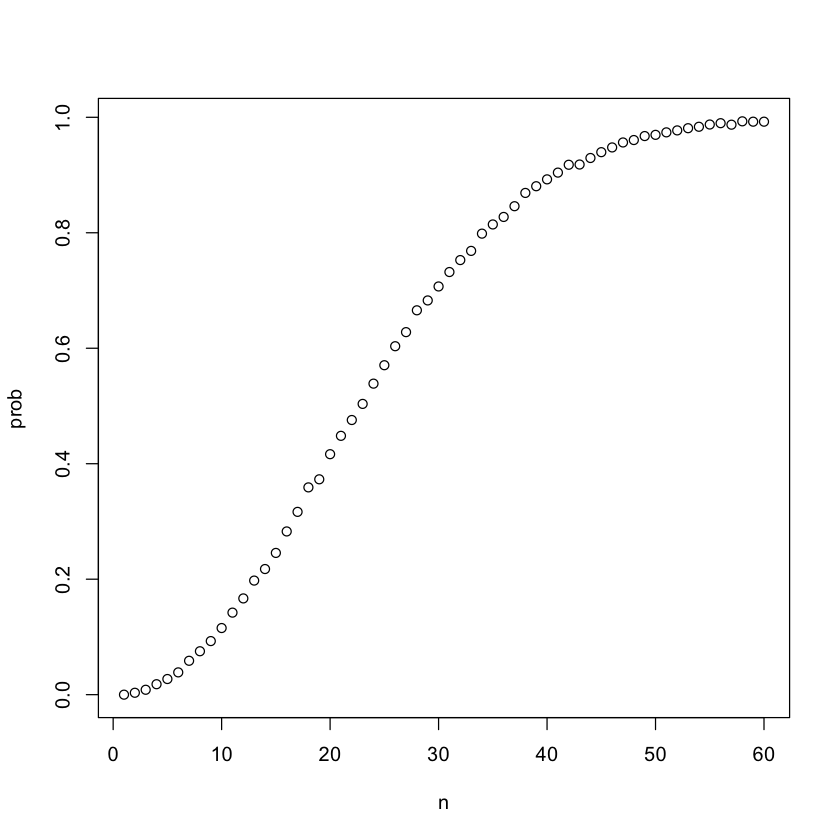

In [171]:
prob <- sapply(n, compute_prob)
plot(n, prob)

The function we just define uses a Monte Carlo simulation, but we can use what we've learned about **probability theory** to compute the exact value. Not only do we get the exact answer using math, but the computations are much faster since we don't have to generate experiments.
We simply get a number.

To make the math simpler for this particular problem,<u>instead of computing the probability of it happening, we'll compute the probability of it not happening</u>, and then we can use a multiplication rule. Let's start with the first person.

The probability that person 1 has a unique birthday is 1, of course.
All right. Now let's move on to the second one. The probability that the second person has a unique birthday given that person 1 already took one other day is 364 divided by 365. Then for a person 3, given that the first two people already have unique birthdays, that leaves 363. So now that probability is 363 divided by 365. 

<div background-color: red>
Pr (person 1 has a unique bday) = 1 <br />
Pr (person 2 has a unique bday | person 1 has a unique bday) = 364/365 <br />
Pr (person 3 has a unique bday | people 1 and 2 has unique bdays) = 363/365<br />
</div>

### $1 \times \frac{364}{365} \times \frac{363}{365} \dots \frac{365 - n + 1}{365}$

If we continue this way and find the chances of all, say, 50 people having unique birthdays, we would multiply 1 times 364 divided by 365, times 363 divided by 365, dot dot
dot, all the way to the 50th element. Here's the equation. Now, we can easily write a function that does this. This time we'll call it exact prob. It takes n as a argument, and it computes this probability using the simple code. Now we can compute each probably for each n using sapply again, like this. And if we plot it, we can see that the Monte Carlo simulations were almost exactly right. They were almost exact approximations of the actual value.

Now, notice had it not been possible to compute the exact probabilities, something that sometimes happens, we would have still been able to accurately estimate the probabilities using Monte Carlo.

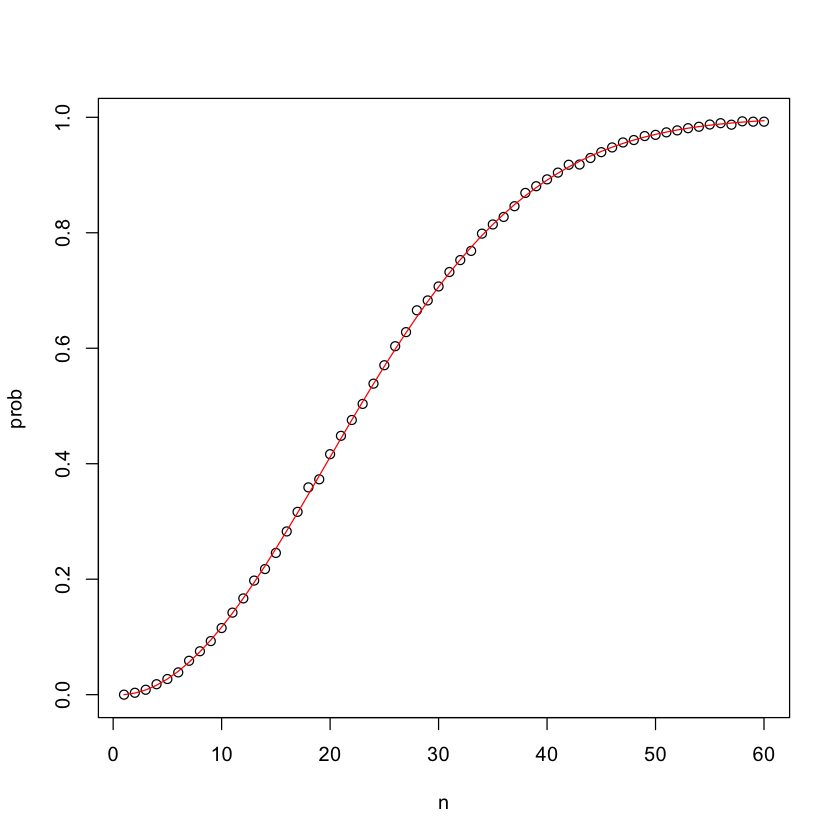

In [174]:
exact_prop <- function(n) {
    prob_unique <- seq(365, 365-n+1)/365
    1 - prod(prob_unique)
}

eprob <- sapply(n, exact_prop)

#plot it
plot(n, prob) #monte carlo
lines(n, eprob, col="red") #mathematical

#### How many Monte Carlo experiments are enought?

In the examples we have seen, we have used 10,000 Monte Carlo experiments.
It turns out that this provided very accurate estimates for the examples
we looked at. In more complex calculations, 10,000 may not nearly be enough. Also for some calculations, 10,000 experiments might not be computationally feasible, and it might be more than we need. 

In practice, we won't know what the answer is, so we don't know if our Monte Carlo estimate is accurate. We know that the larger the number of experiments, we've been using the letter B to represent that, the better the approximation.

But how big do we need it to be?
This is actually a challenging question, and answering it often requires
advanced theoretical statistics training. One practical approach we will describe here is to <u>check for the stability of the estimate</u>.

Here's an example with the birthday problem. We're going to use n equals 22. There's 22 people. So we're going to run a simulation where we compute or estimate the probability of two people having a certain birthday using different sizes of the Monte Carlo simulations. 

So the value of b going to go from 10, to 20, to 40, to 100, et cetera. We compute the simulation, and now we look at the values that we get for each simulation. Remember, each simulation has a different b, a different number of experiments.

In [181]:
B <- 10^seq(1,5, len = 100)

compute_prob <- function(B, n=22){
    same_day <- replicate(B, {
        bdays <- sample(1:365, n, replace= TRUE)
        any(duplicated(bdays))
    })
    mean(same_day)
}

prob <- sapply(B, compute_prob)

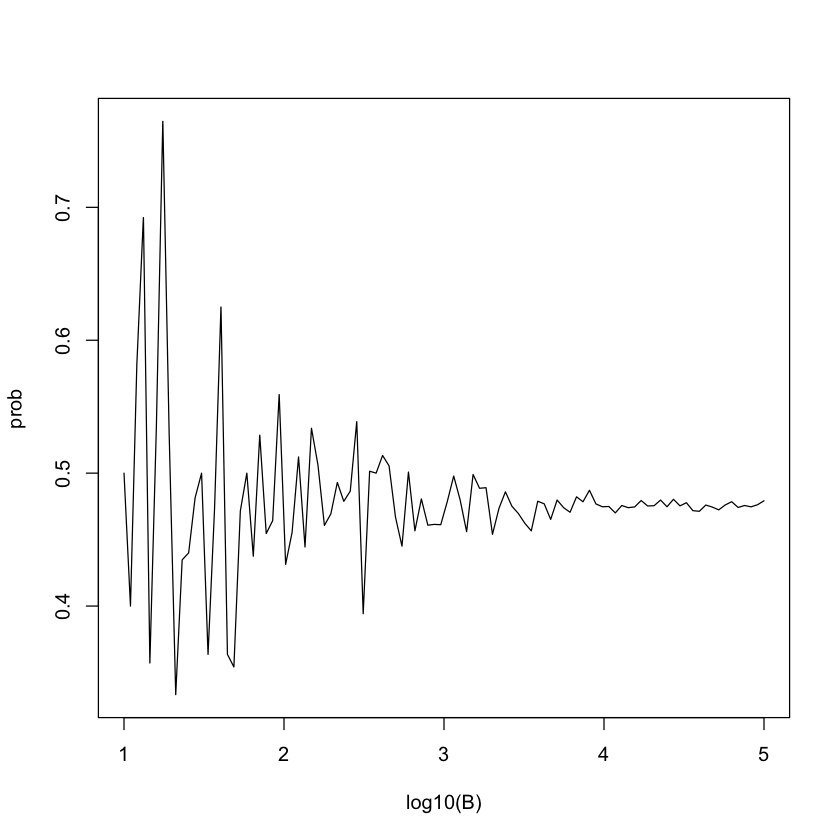

In [187]:
plot(log10(B), prob, type = "l")

When we see this graph, we can see that it's wiggling up and down.
That's because the estimate is not stable yet.
It's not such a great estimate.
But as b gets bigger and bigger, eventually it starts to stabilize.
And that's when we start getting a feeling for the fact
that now perhaps we have a large enough number of experiments.

### Exercise 1. Independence

Q:Imagine you draw two balls from a box containing colored balls. You either replace the first ball before you draw the second or you leave the first ball out of the box when you draw the second ball.

Under which situation are the two draws independent of one another?

Remember that two events A and B are independent if 
**Pr(A and B)=Pr(A)P(B)**

A: You do replace the first ball before drawing the next.

### Exercise 2. Sampling with replacement

Say you’ve drawn 5 balls from the a box that has 3 cyan balls, 5 magenta balls, and 7 yellow balls, with replacement, and all have been yellow.

What is the probability that the next one is yellow?

In [188]:
cyan <- 3
magenta <- 5
yellow <- 7

# Assign the variable 'p_yellow' as the probability that a yellow ball is drawn from the box.
p_yellow = yellow / (cyan + magenta + yellow)

# Using the variable 'p_yellow', calculate the probability of drawing a yellow ball on the sixth draw. Print this value to the console.
p_yellow

[1] 0.4666667

### Exercise 3. Rolling a die

If you roll a 6-sided die six times, what is the probability of not seeing a 6?

In [195]:
# Assign the variable 'p_no6' as the probability of not seeing a 6 on a single roll.
p_no6 = 5/6
p_no6
# Calculate the probability of not seeing a 6 on six rolls.

p_no6^6

[1] 0.8333333

[1] 0.334898

### Exercise 4. Probability the Celtics win a game

Two teams, say the Celtics and the Cavs, are playing a seven game series. The Cavs are a better team and have a 60% chance of winning each game.

What is the probability that the Celtics win at least one game? Remember that the Celtics must win one of the first four games, or the series will be over!

In [196]:
# Assign the variable `p_cavs_win4` as the probability that the Cavs will win the first four games of the series.
p_cavs_win4 = 0.6^4

# Using the variable `p_cavs_win4`, calculate the probability that the Celtics win at least one game in the first four games of the series.
1 - p_cavs_win4

[1] 0.8704

### Exercise 5. Monte Carlo simulation for Celtics winning a game

Create a Monte Carlo simulation to confirm your answer to the previous problem. Use B <- 10000 simulations.

In [224]:
# This line of sample code simulates four random games where the Celtics either lose or win. Each game is independent of other games.
simulated_games <- sample(c("lose","win"), 4, replace = TRUE, prob = c(0.6, 0.4))

# The variable 'B' specifies the number of times we want the simulation to run. Let's run the Monte Carlo simulation 10,000 times.
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling.
set.seed(1)

# Create an object called `celtic_wins` that first replicates the sample code generating the variable called `simulated_games` for `B` iterations and then tallies the number of simulated series that contain at least one win for the Celtics.

celtic_wins <- replicate(B, {
  simulated_games <- sample(c("lose","win"), 4, replace = TRUE, prob = c(0.6, 0.4))
  any(simulated_games == "win")
    #"win" %in% simulated_games 
})

 mean(celtic_wins)

# Calculate the frequency out of B iterations that the Celtics won at least one game. Print your answer to the console.

[1] 0.8757

<a id="1c"></a>
## <font color = "INDIGO">Addition Rules and Monty Hall Assessment</font>
[Top](#top)

#### Addition Rule

Earlier, we showed you how to compute the probability of a natural 21 in blackjack. This is getting a face card and an ace in your first draw.
Here, we're going to show you the **addition rule**, which gives you another way to compute this probability. 

The <u>additional rule tells us that the probability of A or B</u>, right, we're going to have to make this calculation now, because you can get to 21 in two ways. You can get either a face card and then an ace. Or you can get an ace and then a face card.

So we're asking what's the problem of that or? A or B?
The additional rule tells us the probability of A or B is the probably of A plus the probably a B minus the probability of A and B. 

**Pr (A or B) = Pr (A) + Pr (B) - Pr (A and B)**

To understand why this makes sense, think of a Venn diagram. If we're computing the probability of this whole thing happening, A or B, we can add the blue circle plus the pink circle, and then subtract the middle because we have added it twice by adding the blue plus the pink. So it makes sense-- the addition rule makes a lot of sense. So now let's apply it to the natural 21. In the case of natural 21, the intersection is empty. Since both hands can't happen, you can't have both an ace and then a face card, and then at the same time have a face card and then an ace.

Those two things can't happen at the same time. So this will be a very easy application of the addition rule. The probably of an ace followed by a face card we know is 1 over 13 times 16 divided by 51 **(4/52 X 16/51 = 1/13 X 16/51)**. And the probability of a face card followed by an ace is 16 over 52 times 4 over 51 **(16/52 X 4/51)**. These are actually the same, which makes sense to the symmetry.These two values are actually the same. In any case, we get the same result that we got before for the natural 21, which is about 0.05.

In [240]:
(4/52 * 16/51) + (16/52 * 4/51) 

[1] 0.04826546

#### The Monty Hall Problem

We're going to look at one last example from the discrete probability.
It's the Monty Hall problem. In the 1970s, there was a game show called Let's Make a Deal. Monty Hall was the host-- this is where the name of the problem comes from.

At some point in the game, contestants were asked to pick one of three doors. Behind one door, there was a prize. The other two had a goat behind them. And this basically meant that you lost. If the contestant did not pick the prize door on his or her first try, Monty Hall would open one of the two remaining doors
and show the contestant that there was no prize behind that door. So you're left with two doors, the one you picked and one door that you do not know what's behind it.

So then Monty Hall would ask, do you want to switch doors? What would you do? We can use probability to show that if you stick to the original door,
your chances of winning a car or whatever big prize is 1 in 3. But if you switch, your chances double to 2 in 3.

This seems counterintuitive. Many people incorrectly think both chances are 1 in 2, since there's only two doors left and there's a prize behind one of them. You can find details, explanations-- we're going to provide links of the mathematics of how you can calculate that this is, in fact, wrong, that you have a higher chance if you switch.

But here, we're going to use a Monte Carlo simulation to show you
that this is the case. And this will help you understand how it all works.
Note that the code we're going to show you is longer than it needs to be,
but we're using it as an illustration to help you understand the logic behind what actually happens here. 

So let's start by creating a simulation that <u>imitates the strategy of 
sticking to the same door</u>.

In [262]:
#Sticking to same door strategy
B <- 10000

stick <- replicate(B, {
    
    doors <- as.character(1:3)
    prize <- sample(c("car", "goat", "goat"))
    prize_door <- doors[prize == "car"]
    my_pick <- sample(doors, 1)
    show <- sample(doors[!doors %in% c(my_pick, prize_door)], 1)
    stick <- my_pick
    stick == prize_door
})

mean(stick) #still 1 in 3

[1] 0.3373

Let's go through the code.
We're going to do 10,000 experiments. So we're going to do this over and over 10,000 times. First thing we do is we assign the prize to a door.
So the prize is going to be in one of the three doors that we have created. Then that's going to be in prize door. Prize door contains the number of the door with the prize behind it. Then we're going to imitate your pick by taking a random sample of these three doors.

Now, in the next step, we're going to decide which door you're shown.
You're going to be shown not your door and not the door with a prize. You're going to be shown the other one. You stick to your door. That's what you stick to. Nothing changed.

All this that we did right above doesn't matter, because you're sticking to your door. So now we do this over and over again, and at the end,
we ask is the door you chose, the one you stuck to, is that the prize door? How often does this happen? We know it's going to be a 1/3, because none of this procedure changed anything. You started picking one out of three, nothing changed. And now, you are asked, is the one I picked the door? If we run the simulation, we actually see it happening.
We ran it 10,000 times and the probability of winning was 0.3357, about 1 in 3.

In [267]:
#switch doors strategy 

B <- 10000

stick <- replicate(B, {
    
    doors <- as.character(1:3)
    prize <- sample(c("car", "goat", "goat"))
    prize_door <- doors[prize == "car"]
    my_pick <- sample(doors, 1)
    show <- sample(doors[!doors %in% c(my_pick, prize_door)], 1)
    stick <- my_pick
    switch <- doors[!doors %in% c(my_pick, show)]
    switch == prize_door
})

mean(stick) #2 in 3 chance

[1] 0.6636

Now, let's repeat the exercise, but consider the <u>switch strategy</u>.
We start the same way. We have three doors. We assign three prizes at random.

Now, we know which one has the good prize, the car, but we don't tell the contestant. So the contestant has to pick one. It's basically a random pick. That's what my pick is. And now, we're going to show the contestant one door. It can't be the one they chose. And it can't be the one with the car. So that only leaves one door, the door with nothing behind them
that was not chosen. So now, what you're going to do is you're going to switch. You're going to switch to the door that they didn't show you, because the one that they did show you had nothing behind it, so basically what's happening is you are switching from the original that had a 1 in 3 chances of being the one to whatever is the other option, which has to have a 2 in 3 chance. So if we run the simulation, we actually confirm that. We get that the proportion of times we win is 0.6717, which is about 2/3. The Monte Carlo estimate confirms the 2 out of 3 calculation.

### Exercise 1. The Cavs and the Warriors

Two teams, say the Cavs and the Warriors, are playing a seven game championship series. The first to win four games wins the series. The teams are equally good, so they each have a 50-50 chance of winning each game.

If the Cavs lose the first game, what is the probability that they win the series?

* Assign the number of remaining games to the variable `n`.
* Use the `list` function to create a list of game outcomes, where 0 indicates a loss for the Cavs and 1 indicates a win for the Cavs. Assign this value to the variable `l`.
* Use the `expand.grid` function to create a data frame containing all the possibilities for outcomes of the remaining games.
* Use the `rep` function within the `expand.grid` function to indicate the number of columns the results data frame should contain.
* Use the `rowSums` function to identify which combinations of game outcomes result in the Cavs winning the number of games necessary to win the series.
* Use the `mean` function to calculate the proportion of outcomes that result in the Cavs winning the series.

In [397]:
# Assign a variable 'n' as the number of remaining games.
n <- 6

# Assign a variable 'l' to a list of possible game outcomes, where 0 indicates a loss and 1 indicates a win for the Cavs. 
l <- list(c(0,1))
#sample(c(0,1),1, replace = TRUE, prob = c(0.5, 0.5))

# Create a data frame named 'possibilities' that contains all possible outcomes for the remaining games.
possibilities <- expand.grid(rep(l,n))
#expand.grid(rep(list(c(1, 0)), 6))                             

# Create a vector named 'results' that indicates whether each row in the data frame 'possibilities' contains enough wins for the Cavs to win the series.
results <- rowSums(possibilities) >= 4

# Calculate the proportion of 'results' in which the Cavs win the series. Print the outcome to the console.
mean(results)

[1] 0.34375

### Exercise 2. The Cavs and the Warriors - Monte Carlo

Confirm the results of the previous question with a Monte Carlo simulation to estimate the probability of the Cavs winning the series after losing the first game

* Use the `replicate` function to replicate the sample code for `B <- 10000` simulations.
* Use the `sample` function to simulate a series of 6 games with random, independent outcomes of either a loss for the Cavs (0) or a win for the Cavs (1).
* Use the `sum` function to indicate which of the simulated series contained at least 4 wins for the Cavs.
* Use the `mean` function to find the proportion of simulations in which the Cavs win at least 4 of the remaining games.

In [427]:
# The variable `B` specifies the number of times we want the simulation to run. Let's run the Monte Carlo simulation 10,000 times.
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling.
set.seed(1)

# Create an object called `results` that replicates the sample code for `B` iterations and tallies the number of simulated series that contain at least four wins for the Cavs.

results <- replicate(B, {
    outcome <- sample(c(0,1),6, replace = TRUE)
    sum(outcome) >= 4
})

# Calculate the frequency out of `B` iterations that the Cavs won at least four games in the remainder of the series. Print your answer to the console.
mean(results)

[1] 0.3453

### Exercise 3. A and B play a series - part 1

Two teams, A and B, are playing a seven series game series. Team A
is better than team B and has a p >0.5 chance of winning each game.

* Use the function sapply to compute the probability, call it Pr of winning for `p <- seq(0.5, 0.95, 0.025)`.
* Then plot the result `plot(p, prob)`.

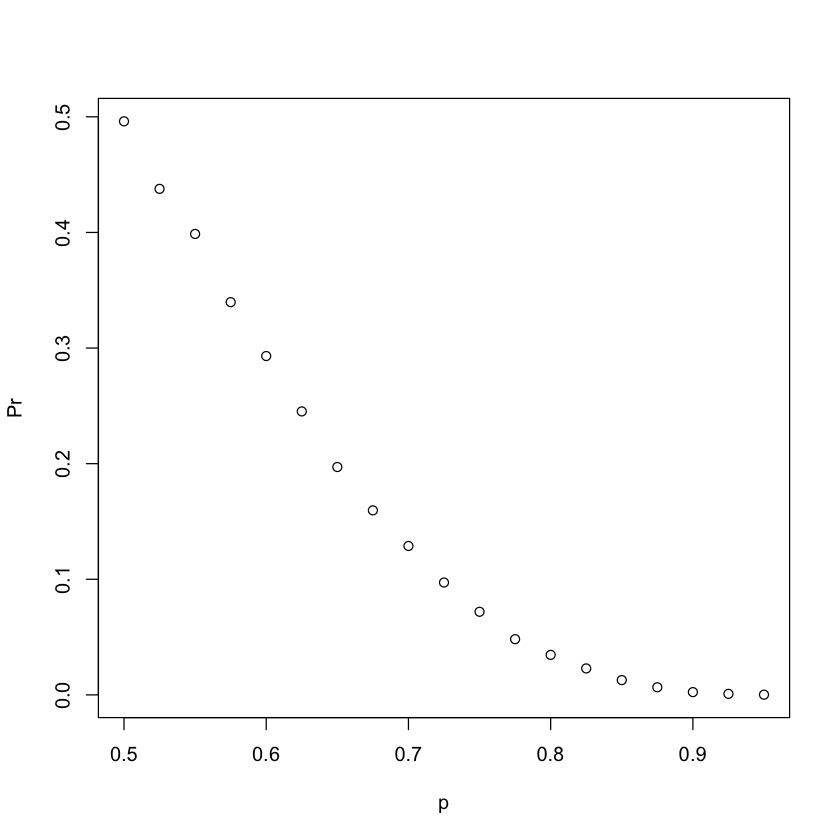

In [430]:
# Let's assign the variable 'p' as the vector of probabilities that team A will win.
p <- seq(0.5, 0.95, 0.025)

# Given a value 'p', the probability of winning the series for the underdog team B can be computed with the following function based on a Monte Carlo simulation:
prob_win <- function(p){
  B <- 10000
  result <- replicate(B, {
    b_win <- sample(c(1,0), 7, replace = TRUE, prob = c(1-p, p))
    sum(b_win)>=4
    })
  mean(result)
}

# Apply the 'prob_win' function across the vector of probabilities that team A will win to determine the probability that team B will win. Call this object 'Pr'.
Pr <- sapply(p, prob_win)

# Plot the probability 'p' on the x-axis and 'Pr' on the y-axis.
plot(p, Pr)

### Exercise 4. A and B play a series - part 2

Repeat the previous exercise, but now keep the probability that team A wins fixed at `p <- 0.75` and compute the probability for different series lengths. For example, wins in best of 1 game, 3 games, 5 games, and so on through a series that lasts 25 games.

* Use the `seq` function to generate a list of odd numbers ranging from 1 to 25.
* Use the function `sapply` to compute the probability, call it `Pr`, of winning during series of different lengths.
* Then plot the result `plot(p, Pr)`.

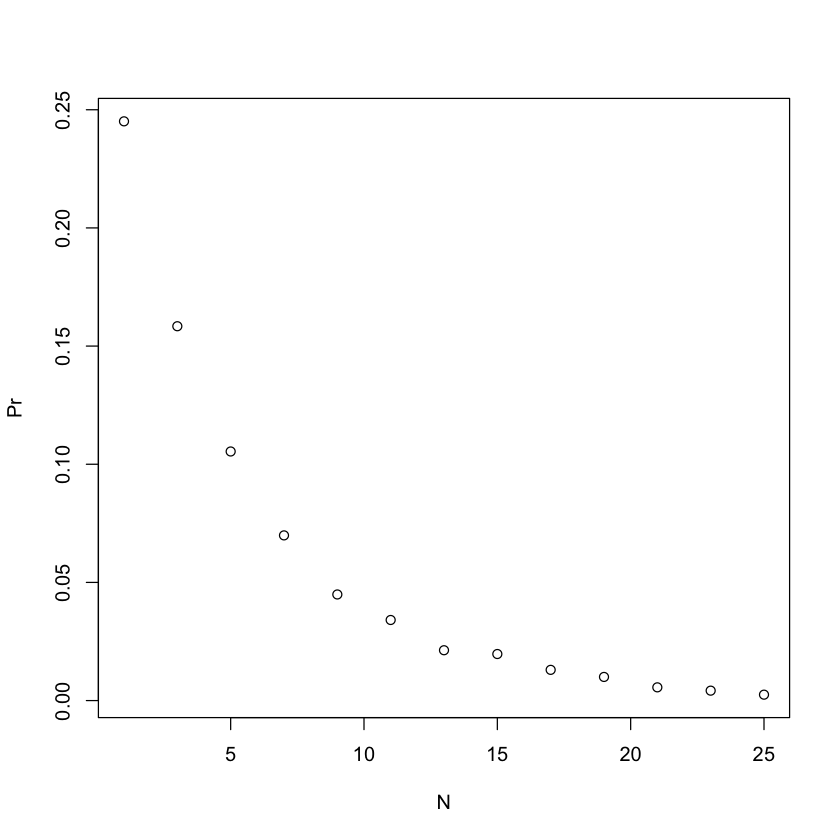

In [440]:
# Given a value 'p', the probability of winning the series for the underdog team B can be computed with the following function based on a Monte Carlo simulation:
prob_win <- function(N, p=0.75){
      B <- 10000
      result <- replicate(B, {
        b_win <- sample(c(1,0), N, replace = TRUE, prob = c(1-p, p))
        sum(b_win)>=(N+1)/2
        })
      mean(result)
    }

# Assign the variable 'N' as the vector of series lengths. Use only odd numbers ranging from 1 to 25 games.
N <- seq(1, 25, 2)

# Apply the 'prob_win' function across the vector of series lengths to determine the probability that team B will win. Call this object `Pr`.
Pr <- sapply(N, prob_win)

# Plot the number of games in the series 'N' on the x-axis and 'Pr' on the y-axis.
plot(N, Pr)

# Section 2
[Top](#top)

After completing Section 2, you will:

* understand the differences between calculating probabilities for discrete and continuous data.
* be able to use cumulative distribution functions to assign probabilities to intervals when dealing with continuous data.
* be able to use R to generate normally distributed outcomes for use in Monte Carlo simulations.
* know some of the useful theoretical continuous distributions in addition to the normal distribution, such as the student-t, chi-squared, exponential, gamma, beta, and beta-binomial distributions.


Notes:

* Discrete data is counted, 
* Continuous data is measured

Discrete data can only take particular values. There may potentially be an infinite number of those values, but each is distinct and there's no grey area in between. Discrete data can be numeric -- like numbers of apples -- but it can also be categorical -- like red or blue, or male or female, or good or bad.

Continuous data are not restricted to defined separate values, but can occupy any value over a continuous range. Between any two continuous data values there may be an infinite number of others. Continuous data are always essentially numeric.

<a id="2a"></a>
### <font color = "INDIGO">Continous Probability</font>

Earlier we explained why when summarizing a list of numeric values such as heights, it's not useful to construct a distribution that assigns
a proportion to each possible outcome.

Note, for example, that if we measure every single person in a very large population with extremely high precision, because no two people are exactly the same height, we would need to assign a proportion to each observed value and attain no useful summary at all.

Similarly when defining probability distributions, it is not useful to assign a very small probability to every single height. Just like when using distributions to summarize numeric data, it is much more practical to define a function that operates on intervals rather than single values.

The standard way of doing this is using the **cumulative distribution function (CDF)**.We previously described the **empirical cumulative distribution function (eCDF)** as a basic summary of a list of numeric values. As an example, we define the eCDF for heights for male adult students. 

In [114]:
library(tidyverse)
library(dslabs)
data(heights)

x <- heights %>% filter(sex == "Male") %>% .$height

Here, we define the vector x use as an example that contains the male heights. We use this little piece of code. Now we can define the **empirical distribution function** like this very simply. We just count the number of cases where x is smaller or equal to a and divide by n. We take the mean, that's the proportion of cases. So for every value of a, this gives a proportion of values in the list x that are smaller or equal to a.

In [123]:
F <- function(a) mean(x <= a)

Note that we have not yet introduced probability. We've been talking about list of numbers and summarizing these lists. So let's introduce probability. For example, let's ask if I pick one of the male students
at random, what is the chance that he is taller than 70.5 inches? Because every student has the same chance of being picked, the answer to this question is the proportion of students that are taller than 70.5.

Using eCDF, we obtain the answer. We simply type 1 minus f of 70, and we get about 37%.

In [124]:
1 - F(70)

[1] 0.3768473

Once the CDF is defined, we can use this to compute the probability of any subset. For example, the probability of a student being
between the height `a` and the height `b` is simply  
`F(b) - F(a)`. Because we can compute the probability for any possible event this way, the cumulative probability function defines a probability distribution for picking a height at random from our vector of heights x.

<a id="2b"></a>
### <font color = "INDIGO">Theoretical Distribution</font>

In the data visualization model, we introduced the normal distribution as a useful approximation to many naturally occurring distributions, including that of height.

The cumulative distribution for the normal distribution is defined by a mathematical formula, which in R can be obtained with the function `pnorm`. We say that a random quantity is normally distributed with average, avg, and standard deviation, s, if it's probability distribution
is defined by f of a equals pnorm a, average, s.
This is the code.

In [448]:
#normal distribution pnorm()

1 - pnorm(70.5, mean(x), sd(x))

[1] 0.371369

This is useful, because if we are going to use the normal approximation for say, height, we don't need the entire dataset to answer questions such as, what is the probability that a randomly selected student is taller and 70.5 inches.

We just need the average height and the standard deviation. Then we can use this piece of code, 1 minus pnorm 70.5 mean of x, sd of x. And that gives us the answer of 0.37. The normal distribution is derived mathematically. Apart from computing the average in the standard deviation, we don't use data to define it.

Also the normal distribution is defined for continuous variables. It is not described for discrete variables. However, for practicing data scientists, pretty much everything we do involves data, which is technically speaking discrete.

For example, we could consider our adult data categorical with each specific height a unique category. The probability distribution would then be defined by the proportion of students reporting each of those unique heights. Here is what a plot of that would look like.

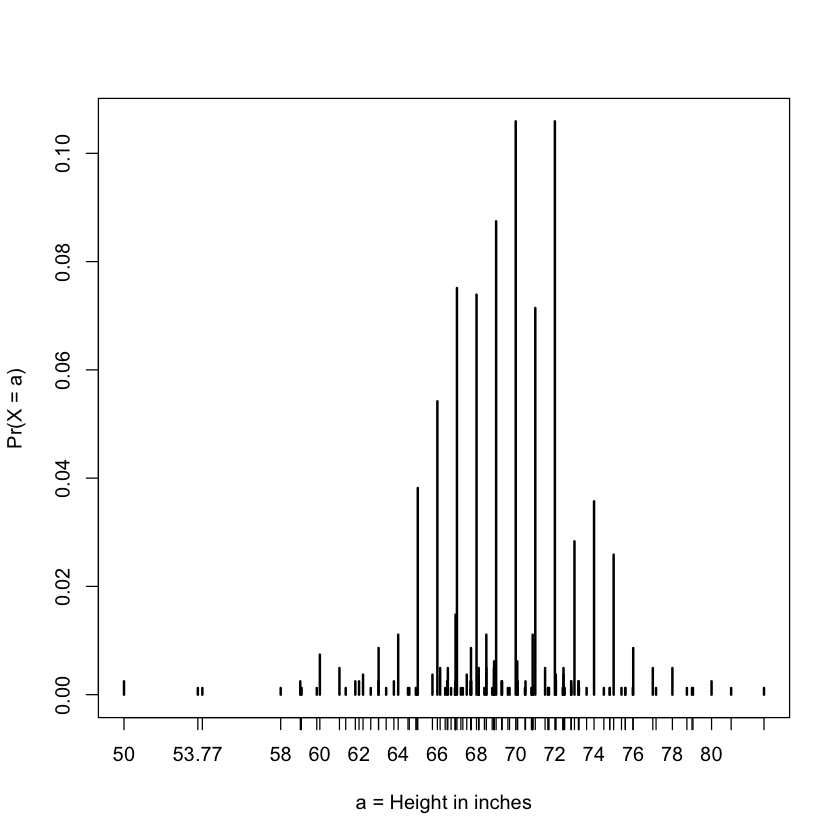

In [459]:
plot(prop.table(table(x)), xlab = "a = Height in inches", ylab = "Pr(X = a)")

This would be the distribution function for those categories. So each reported height gets a probability defined by the proportion of students reporting it. Now while most students rounded up their height to the nearest inch, others reported values with much more precision. For example, student reported his height to be 69.6850393700787.

What is that about?

What's that very, very precise number? Well, it turns out, that's 177 centimeters. So the student converted it to inches, and copied and pasted the result into the place where they had to report their heights. The probably assigned to this height is about 0.001. It's 1 in 708. However, the probability for 70 inches is 0.12. This is much higher than what was reported with this other value.

But does it really make sense to think that the probability of being exactly 70 inches is so much higher than the probability of being 69.68?
Clearly, it is much more useful for data analytic purposes to treat this outcome as a continuous numeric variable. But keeping in mind that very few people, perhaps none, are exactly 70 inches. But rather, that people rounded to the nearest inch. With **continuous distributions**, the probability of a singular value is not even defined.

For example, it does not make sense to ask what is the probability that a normally distributed value is 70. Instead, we define probabilities for intervals. So we could ask instead, what is a probability that someone
is between 69.99 and 70.01. In cases like height in which the data is rounded, the normal approximation is particularly useful if we deal with intervals that include exactly one round number.

So for example, the normal distribution is useful for approximating the proportion of students reporting between 69.5 and 70.5.

Here are three other examples. Look at the numbers that are being reported. This is using the data, the actual data, not the approximation.
Now look at what we get when we use the approximation. We get almost the same values.

In [460]:
## Actual
mean(x <= 68.5) - mean(x <= 67.5)
mean(x <= 69.5) - mean(x <= 68.5)
mean(x <= 70.5) - mean(x <= 69.5)

[1] 0.114532

[1] 0.1194581

[1] 0.1219212

In [461]:
#Approximation
pnorm(68.5, mean(x), sd(x)) -  pnorm(67.5, mean(x), sd(x))
pnorm(69.5, mean(x), sd(x)) -  pnorm(68.5, mean(x), sd(x))
pnorm(70.5, mean(x), sd(x)) -  pnorm(69.5, mean(x), sd(x))

[1] 0.1031077

[1] 0.1097121

[1] 0.1081743

For these particular intervals, the normal approximation is quite useful.
However, the approximation is not that useful for other intervals.

For example, those that don't include an integer. Here are two examples.

If we use these two intervals, again, this is the data, look at the approximations now with the normal distribution. They're not that good.

In general, we call this situation **discretization**. Although the true height distribution is continuous, the reported heights tend to be more common at discrete values, in this case, due to rounding. As long as we are aware of how to deal with this reality, the normal approximation can still be a very useful tool.

In [458]:
#when approximation is not useful
mean(x <= 70.9) - mean(x <= 70.1)
pnorm(70.9, mean(x), sd(x)) -  pnorm(70.1, mean(x), sd(x))

[1] 0.02216749

[1] 0.08359562

<a id="2c"></a>
### <font color = "INDIGO">Probability Density</font>


For categorical data, we can define the probability of a category. For example, a roll of a die, let's call it x, can be 1, 2, 3, 4, 5, or 6. The probably of 4 is defined as probability of x equals 4 is 1/6.

 $Pr( X = 4) = \frac{1}{6}$

The CDF can easily be defined by simply adding up probability. So f of 4 is a probability of x being less than 4, which is probably x being 4, or 3, or 2, or 1. So we just add up those probabilities.

 $F(4) = Pr(X \leq 4) = Pr(X = 4)+Pr(X = 3)+Pr(X = 2)+Pr(X = 1)$

In contrast, for **continuous distributions**, <u>the probability of a single value is not defined</u>. However, there is a theoretical definition that has a similar interpretation. This has to do with the **probability density**. The probability density at x is defined as the function, we're going to call it little f of x, such that the probability distribution big F of a, which is the probability of x being less than or equal to a, is the integral of all values up to a of little f of x dx.

 $F(a) = Pr(X \leq a) =  \int_{\infty}^{a} f(x) dx$


For those that know calculus, remember, that the integral is related to a sum. It's the sum of bars with widths that are approximating 0. If you don't know calculus, you can think of little f of x as a curve for which the area under the curve up to the value a gives you the probability of x being less than or equal to a.


<img src="2.png">

For example, to use the normal approximation to estimate the probability of someone being taller than 76 inches, we can use the probability density. So this is a mathematical formula. Mathematically, the gray area in this figure represents the probability of x being bigger than 76.
The curve you see is a probability density function for the normal distribution.

In [467]:
avg <- mean(x)
s <- sd(x)
1 - pnorm(76, avg, s)

[1] 0.03206008

<img src="1.png">

In R you get the probability density function for the normal distribution
using the function `dnorm()`. D stands for density. **Although it may not be immediately obvious why knowing of all probability densities is useful, understanding this concept will be essential to those wanting to fit models to data for which predefined functions are not available.**

<a id="2d"></a>
### <font color = "INDIGO">Monte Carlo Simulations</font>

In this video, we're going to show you how to run Monte Carlo simulations using normally distributed variables.

R provides a function to generate normally distributed outcomes. Specifically, the `rnorm` function takes three arguments-- size; average,
which defaults to 0; standard deviation, which defaults to 1-- and produces these random numbers.

Here's an example of how we can generate data that looks like our reported heights. So if our reported heights are in the vector x, the computed
length, their average, and their standard deviation, and then use the `rnorm` function to generate the randomly distributed outcomes. Not surprisingly, the distribution of these outcomes looks normal because they were generated to look normal.

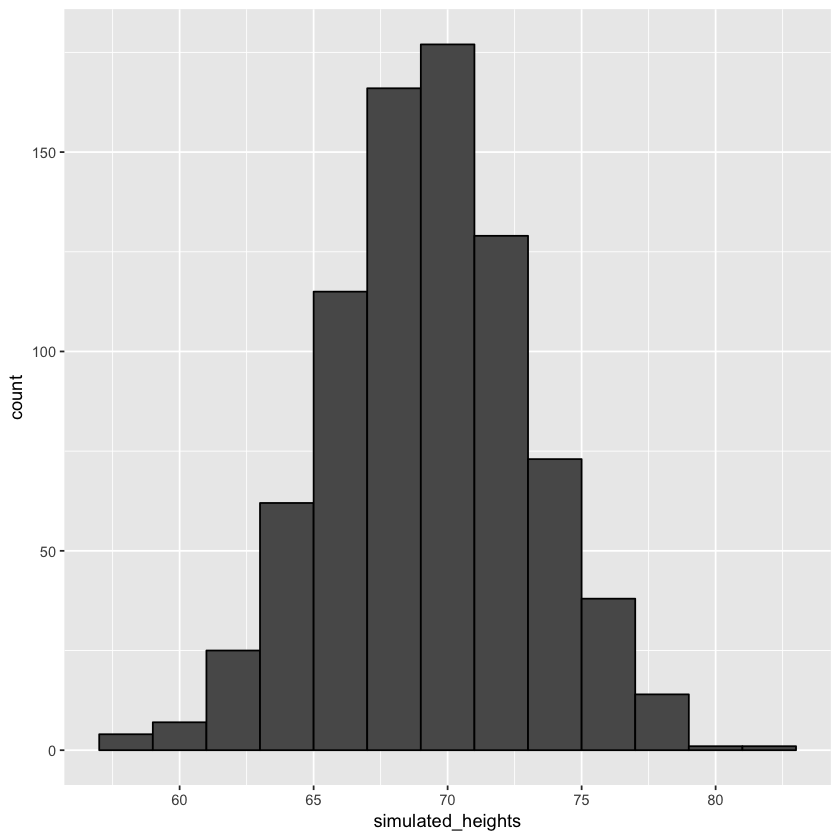

In [127]:
x <- heights %>% filter(sex == "Male") %>% .$height
n <- length(x)
avg <- mean(x)
s <- sd(x)

simulated_heights <- rnorm(n, avg, s)

data.frame(simulated_heights = simulated_heights) %>%
    ggplot(aes(simulated_heights)) +
    geom_histogram(color="black", binwidth = 2)


# data.frame(actual_heights = x) %>%
#     ggplot(aes(x)) +
#     geom_histogram(color="black", binwidth = 2)

This is one of the most useful functions in R, as it will permit us to generate data that mimics naturally occurring events, and it'll let us answer questions related to what could happen by chance by running Monte Carlo simulations.

**For example**, if we pick 800 males at random, what is the distribution of the tallest person? Specifically, we could ask, how rare is that the tallest person is a seven footer?

We can use the following Monte Carlo simulation to answer this question.
We're going to run 10,000 simulations, and for each one, we're going to generate 800 normally distributed values, pick the tallest one, and return that. The tallest variable will have these values. So now we can ask, what proportion of these simulations return a seven footer as the tallest person?

And we can see that it's a very small number.

In [130]:
B <- 10000
tallest <- replicate(B, {
    simulated_data <- rnorm(800, avg, s)
    max(simulated_data)
})

mean(tallest >= 7*12)

[1] 0.0217

<a id="2e"></a>
### <font color = "INDIGO">Other continuous distributions</font>
[Top](#top)

The normal distribution is not the only useful theoretical distribution.
Other continuous distributions that we may encounter are:

* student-t
* chi-squared
* exponential
* gamma
* beta distribution

R provides functions to compute the <u>density, the quantiles, the cumulative distribution function, and to generate Monte Carlos simulations for all these distributions</u>.

R uses a convention that lets us remember the names of these functions.
Namely, using the letters `d` for density, `q` for quantile, `p` for probability density function, and `r` for random.

By putting these letters in front of a shorthand for the distribution, gives us the names of these useful functions. We have already seen the functions `dnorm`, `pnorm`, and `rnorm`. So these are examples of what we just described. These are for the normal distribution. Norm is the nickname or shorthand for the normal distribution. The function `qnorm` gives us the quantiles. For example, we can use the dnorm function to generate this plot. This is the density function for the normal distribution.

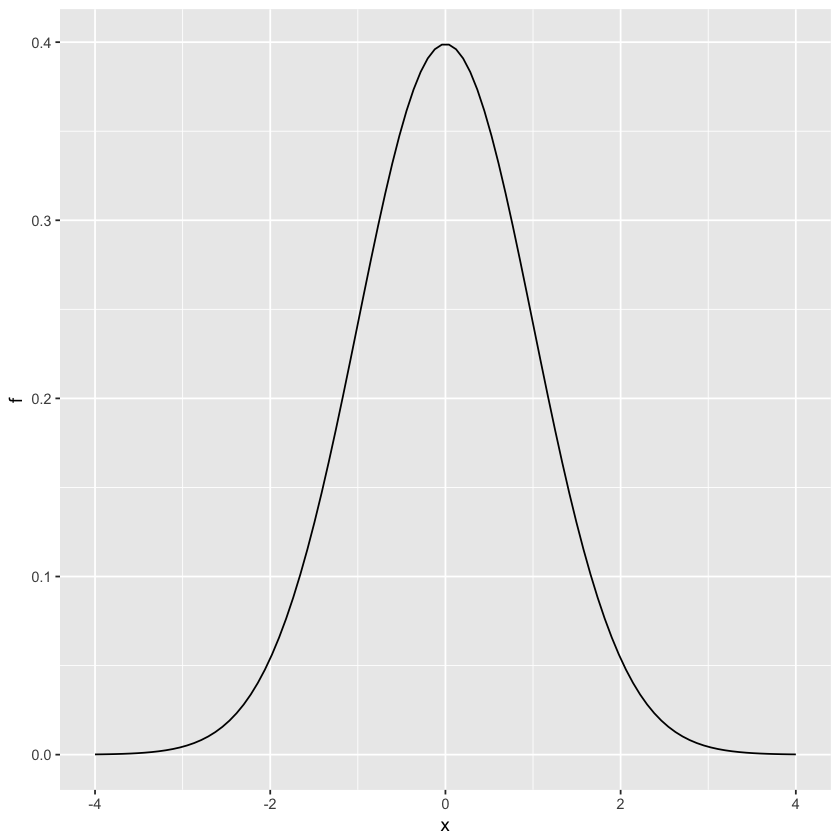

In [482]:
x <- seq(-4, 4, length.out = 100)
data.frame(x, f = dnorm(x)) %>%
    ggplot(aes(x, f)) +
    geom_line()

We use the function dnorm. For the student's `t-distribution`, which has shorthand `t`, we can use the functions `dr`, `qt`, `pt`, and `rt` to generate the **density, quantiles, probability density function, or a Monte Carlo simulation**.

### Exercise 1. Distribution of female heights - 1

Assume the distribution of female heights is approximated by a normal distribution with a mean of 64 inches and a standard deviation of 3 inches. If we pick a female at random, what is the probability that she is 5 feet or shorter?

* Use `pnorm` to define the probability that a height will take a value less than 5 feet given the stated distribution.

In [484]:
# Assign a variable 'female_avg' as the average female height.
female_avg <- 64

# Assign a variable 'female_sd' as the standard deviation for female heights.
female_sd <- 3

# Using variables 'female_avg' and 'female_sd', calculate the probability that a randomly selected female is shorter than 5 feet. Print this value to the console.

pnorm(5*12, female_avg, female_sd)

[1] 0.09121122

### Exercise 2. Distribution of female heights - 2

Assume the distribution of female heights is approximated by a normal distribution with a mean of 64 inches and a standard deviation of 3 inches. If we pick a female at random, what is the probability that she is 6 feet or taller?
* Use pnorm to define the probability that a height will take a value of 6 feet or taller.

In [485]:
# Assign a variable 'female_avg' as the average female height.
female_avg <- 64

# Assign a variable 'female_sd' as the standard deviation for female heights.
female_sd <- 3

# Using variables 'female_avg' and 'female_sd', calculate the probability that a randomly selected female is 6 feet or taller. Print this value to the console.
1- pnorm(6*12, female_avg, female_sd)

[1] 0.003830381

### Exercise 3. Distribution of female heights - 3

Assume the distribution of female heights is approximated by a normal distribution with a mean of 64 inches and a standard deviation of 3 inches. If we pick a female at random, what is the probability that she is between 61 and 67 inches?
* Use `pnorm` to define the probability that a randomly chosen woman will be shorter than 67 inches.
* Subtract the probability that a randomly chosen will be shorter than 61 inches.

In [499]:
# Assign a variable 'female_avg' as the average female height.
female_avg <- 64

# Assign a variable 'female_sd' as the standard deviation for female heights.
female_sd <- 3

# Using variables 'female_avg' and 'female_sd', calculate the probability that a randomly selected female is between the desired height range. Print this value to the console.

pnorm(67, female_avg, female_sd)- pnorm(61, female_avg, female_sd)

[1] 0.6826895

### Exercise 4. Distribution of female heights - 4

Repeat the previous exercise, but convert everything to centimeters. That is, multiply every height, including the standard deviation, by 2.54. What is the answer now?
* Convert the average height and standard deviation to centimeters by multiplying each value by 2.54.
* Repeat the previous calculation using `pnorm` to define the probability that a randomly chosen woman will have a height between 61 and 67 inches, converted to centimeters by multiplying each value by 2.54.

In [500]:
# Assign a variable 'female_avg' as the average female height. Convert this value to centimeters.
female_avg <- 64*2.54

# Assign a variable 'female_sd' as the standard deviation for female heights. Convert this value to centimeters.
female_sd <- 3*2.54

# Using variables 'female_avg' and 'female_sd', calculate the probability that a randomly selected female is between the desired height range. Print this value to the console.
pnorm(67*2.54, female_avg, female_sd)- pnorm(61*2.54, female_avg, female_sd)

[1] 0.6826895

### Exercise 5. Probability of 1 SD from average

Compute the probability that the height of a randomly chosen female is within 1 SD from the average height.
* Calculate the values for heights one standard deviation taller and shorter than the average.
* Calculate the probability that a randomly chosen woman will be within 1 SD from the average height.

In [502]:
# Assign a variable 'female_avg' as the average female height.
female_avg <- 64

# Assign a variable 'female_sd' as the standard deviation for female heights.
female_sd <- 3

# To a variable named 'taller', assign the value of a height that is one SD taller than average.
taller = female_avg + female_sd

# To a variable named 'shorter', assign the value of a height that is one SD shorter than average.
shorter = female_avg - female_sd

# Calculate the probability that a randomly selected female is between the desired height range. Print this value to the console.
pnorm(taller, female_avg, female_sd)- pnorm(shorter, female_avg, female_sd)

[1] 0.6826895

### Exercise 6. Random variable

To see the math that explains why the answers to the previous exercises are the same, suppose we have a random variable with expected value `μ`
and standard error `σ`. Suppose we ask the probability of `X` being smaller or equal to `a`. Remember that, by definition, `a` is `(a−μ)/σ` standard deviations `σ` away from the average `μ` . The probability is:

$Pr(X \leq a)$

Now, we subtract $\mu$ to both sides and then divide both sides by $\sigma$:

$Pr \large(\frac{X-\mu}{\sigma} \leq \frac{a - \mu}{\sigma} \large)$

The quantity on the right is a standard normal random variable. It has an average of `0` and a standard error of `1`. We will call it `Z`:

$Pr\large(Z \leq \frac{a - \mu}{\sigma} \large)$

So, no matter the units, the probability of $X \leq a$  is the same as the probability of a standard normal variable being less than `(a−μ)/σ`. If `mu` is the average and `sigma` the standard error, which of the following R code would therefore give us the right answer in every situation:


A: pnorm((a - mu)/sigma)

### Exercise 7. Distribution of male heights

Imagine the distribution of male adults is approximately normal with an expected value of 69 inches and a standard deviation of 3 inches. How tall is a male in the 99th percentile?
* Determine the height of a man in the 99th percentile, given an average height of 69 inches and a standard deviation of 3 inches

In [505]:
# Assign a variable 'female_avg' as the average female height.
male_avg <- 69

# Assign a variable 'female_sd' as the standard deviation for female heights.
male_sd <- 3

# Determine the height of a man in the 99th percentile of the distribution.
qnorm(0.99, male_avg, male_sd)

[1] 75.97904

### Exercise 8. Distribution of IQ scores

The distribution of IQ scores is approximately normally distributed. The expected value is 100 and the standard deviation is 15. Suppose you want to know the distribution of the person with the highest IQ in your school district, where 10,000 people are born each year.

Generate 10,000 IQ scores 1,000 times using a Monte Carlo simulation. Make a histogram of the highest IQ scores.

* Use the function `rnorm` to generate a random distribution of 10,000 values with a given average and standard deviation.
* Use the function `max` to return the largest value from a supplied vector.
* Repeat the previous steps a total of 1,000 times.
* Plot the histogram of values using the function `hist`.

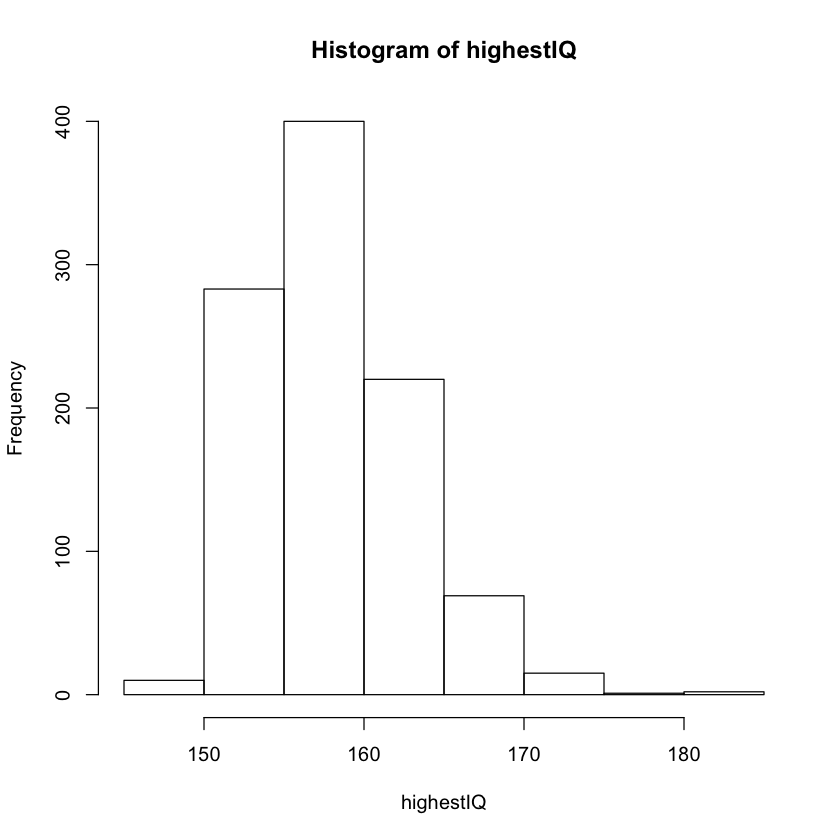

In [512]:
# The variable `B` specifies the number of times we want the simulation to run.
B <- 1000

# Use the `set.seed` function to make sure your answer matches the expected result after random number generation.
set.seed(1)

# Create an object called `highestIQ` that contains the highest IQ score from each random distribution of 10,000 people.
highestIQ <- replicate(B, {
    r <- rnorm(10000, 100, 15)
    max(r)
})
# Make a histogram of the highest IQ scores.
hist(highestIQ)

# Section 3

After completing Section 3, you will:

* understand what random variables are, how to generate them, and the correct mathematical notation to use with them.
* be able to use sampling models to estimate characteristics of a larger population.
* be able to explain the difference between a distribution and a probability distribution.
* understand the Central Limit Theorem and the law of large numbers.


<a id="3a"></a>
### <font color = "INDIGO">Random Variables an Sampling Models</font>
[Top](#top)

### Random Variables

Random variables are numeric outcomes resulting from a random process.
We can easily generate random variables using some of the simple examples we have shown, such as the red and blue bead urn.

For example, define x to be 1 if a bead is blue, and red otherwise. Here's a R code you can write to generate that random variable. X is a random variable.

Every time we select a new bead, the outcome changes randomly. Sometimes it's 1, sometimes it's 0. Here's some examples of how that random variable changes. We're going to do it three times. Here is 0, here is 1, and here's 1 again. In data science, we often deal with data that is affected by chance in some way. The data comes from a random sample, the data is affected by measurement error, or the data measures some outcome that is random in nature.

>Being able to quantify the uncertainty introduced by randomness is one of the most important jobs of a data scientist.

**Statistical inference** offers a framework for doing this, as well as several practical tools. The first step is to learn how to mathematically describe random variables.

We start with games of chance as an illustrative example.

In [526]:
beads <- rep(c("red", "blue"), times = c(2,3))

X <- ifelse(sample(beads, 1) == "blue", 1, 0)

In [528]:
ifelse(sample(beads, 1) == "blue", 1, 0)
ifelse(sample(beads, 1) == "blue", 1, 0)
ifelse(sample(beads, 1) == "blue", 1, 0)

[1] 0

[1] 1

[1] 1

### Sampling Models

Many data-generation procedures, those that produce data that we study, can be modeled quite well as draws from an urn. For example, we can model the process of polling likely voters as drawing 0's-- Republicans-- and 1's-- Democrats-- from an urn containing the 0 and 1 code for all likely voters. We'll see that in more detail later.

In epidemiological studies, we often assume that the subjects in our study
are a random sample from the population of interest. The data related to a specific outcome can be modeled as a random sample from an urn containing the values for those outcomes for the entire population of interest.

Similarly, in experimental research, we often assume that the individual
organisms we are studying-- for example, worms, flies, or mice-- are a random sample from a larger population. Randomized experiments can also be modeled by draws from urn, given the way individuals are assigned to groups.

When getting assigned, you draw your group at random. Sampling models are therefore ubiquitous in data science. Casino games offer a plethora of examples of real-world situations in which sampling models are used to answer specific questions. We will therefore start with such examples.

OK, let's start with this.

Suppose a very small casino hires you to consult on whether they should set up a roulette wheel. They want to know if they can make money off it, or if it's too risky and they might lose. To keep the example simple, we will assume that 1,000 people will play, and that the only game you can play is to bet on red or black. The casino wants to predict how much money they will make or lose. They want a range of values that are possible,
and in particular, they want to know, what is the chance of losing money?

If this probability is too high, they will pass on installing roulette wheels, since they can't take the risk, given that they need to pay their employees and keep the lights on. We're going to define a random variable, capital `S`, that will represent the casino's total winnings. Let's start by constructing the urn, the urn we use for our sampling model.

A roulette wheel has 18 red pockets, 18 black pockets, and 2 green ones.
So playing a color in one game of roulette is equivalent to drawing from this urn. Let's write some code.

There's 18 black, 18 red, and 2 green. 


In [6]:
color <- rep(c("Black","Red", "Green"), c(18, 18, 2))
color

[1] "Black" "Black" "Black" "Black" "Black" "Black" "Black" "Black" "Black"
[10] "Black" "Black" "Black" "Black" "Black" "Black" "Black" "Black" "Black"
[19] "Red"   "Red"   "Red"   "Red"   "Red"   "Red"   "Red"   "Red"   "Red"  
[28] "Red"   "Red"   "Red"   "Red"   "Red"   "Red"   "Red"   "Red"   "Red"  
[37] "Green" "Green"

The 1,000 outcomes from 1,000 people playing are independent draws from this urn. If red comes up, the gambler wins, and the casino loses \$1, so we draw a negative 1. Otherwise, the casino wins \$1, and we draw a 1. We can code 1,000 independent draws using the following code.


Here are the first 10 outcomes of these 1,000 draws. 

In [37]:
n <- 1000
X <- sample(ifelse(color =="Red", -1, 1), n, replace = TRUE)
X[1:10]

[1]  1 -1 -1  1  1  1  1 -1 -1  1

Because we know the proportions of 1's and negative 1's, inside the urn, we can generate the draws with one line of code, without defining color. Here's that line of code.

We call this approach a **sampling model**, <u>since we are modeling the random behavior of a roulette with the sampling of draws from an urn </u>.

The total winnings, capital `S`, is simply the sum of these 1,000 independent draws. So here's a code that generates an example of S. If you run that code over and over again, you see that `S` changes every time. This is, of course, because `S` is a **random variable**. A very important and useful concept is the probability distribution of the random variable.


In [132]:
X <- sample(c(-1,1), n, replace = TRUE, prob = c(9/19, 10/19))

S <- sum(X)
S

[1] 58

In [133]:
X <- sample(c(-1,1), n, replace = TRUE, prob = c(9/19, 10/19))

S <- sum(X)
S

[1] 88

In [134]:
X <- sample(c(-1,1), n, replace = TRUE, prob = c(9/19, 10/19))

S <- sum(X)
S

[1] 46

The **probability distribution of a random variable** tells us the probability of the observed value falling in any given interval. So for example, if we want to know the probability that we lose money, we're asking, what is the probability that `S` is in the interval `S` less than 0?

Note that if we can define a commutative distribution function-- let's call it f of a `f(a)`, which is equal to the probability of `S` being less than or equal to a-- 

$F(a) = Pr(S \leq a)$

then we'll be able to answer any question related
to the probability of events defined by a random variable S, including the event `S` less than 0.

We call `F` the <u>random variable's distribution function</u>. We can estimate the distribution function for the random variable `S` by using a **Monte Carlo** simulation to generate many, many realizations of the random variable. With the code we're about to write, we run the experiment of having 1,000 people play roulette over and over. Specifically, we're going to do this experiment 10,000 times.

Here's the code.



In [137]:
n <- 1000
B <- 10000

S <- replicate(B, {
    X <- sample(c(-1,1), n, replace = TRUE, prob = c(9/19, 10/19))
    sum(X)
})

a = 0
mean(S <= a)

[1] 0.0497

So now we're going to ask, in our simulation, how often did we get sums smaller or equal to `a`? We can get the answer by using this simple code.
This will be a very good approximation of f of a `f(a)`, our distribution function. In fact, we can visualize the distribution by creating a histogram showing the probability `f(b) - f(a)` for several intervals ab.

Here it is.



<img src="3.png">

Now we can easily answer the casino's question, how likely is it that we lose money? We simply ask, how often was S, out of the 10,000 simulations, smaller than 0? And the answer is, it was only 4.6% of the time.
So it's quite low. 

In [138]:
mean(S<0)

[1] 0.044

From the histogram, we also see that that distribution
appears to be approximately normal. If you make a Q-Q plot, you'll confirm that the normal approximation is close to perfect.

If, in fact, the distribution is normal, then all we need to define is the distribution's average and standard deviation. Because we have the original values from which the distribution is created, we can easily compute these. The average is 52.5, and the standard deviation is 31.75.


In [51]:
mean(S)
sd(S)

[1] 52.6032

[1] 31.48379

If we add a normal density with this average and standard deviation to the histogram we created earlier, we see that it matches very well. <u>This average and this standard deviation have special names</u>. They are referred to as the **expected value** and the **standard error** of the random variable `S`.

We will say more about this in the next section. It actually turns out that statistical theory provides a way to derive the distribution of a random variable defined as independent draws from an urn.


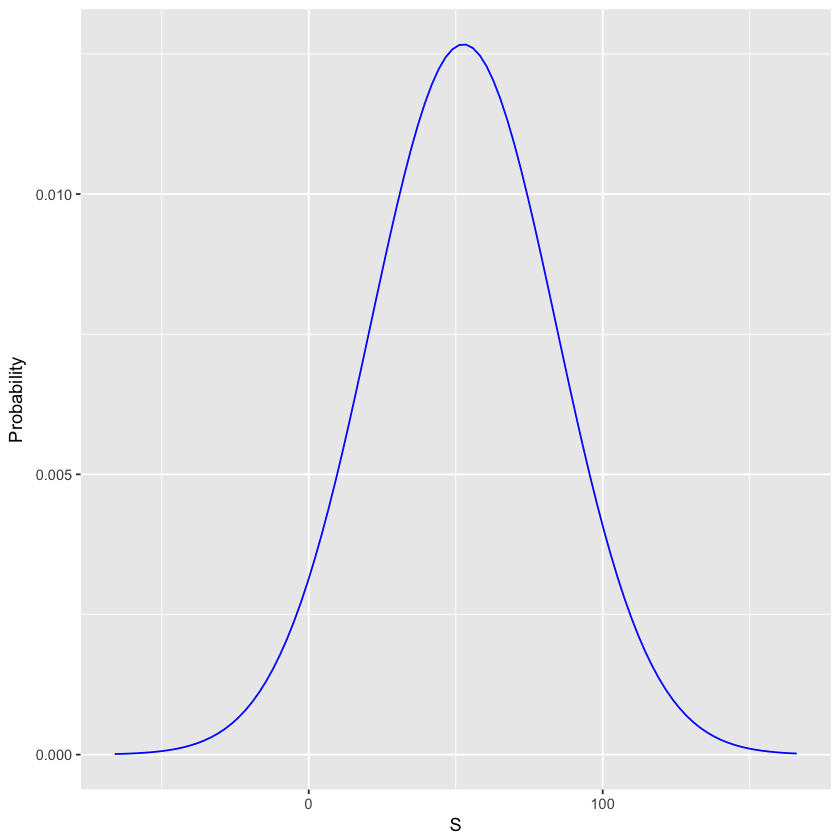

In [58]:
s <- seq(min(S), max(S), length = 100)
normal_density <- data.frame(s = s, f=dnorm(s, mean(S), sd(S)))
data.frame(S=S) %>% 
    ggplot(aes(S, ..density..)) +
    ylab("Probability") + 
    geom_line(data = normal_density, mapping=aes(s, f), color="blue")

<img src="4.png">

Specifically, in our example, we can show that S plus n divided by 2 

# $\frac{(S + n)}{2}$

follows what is known as a **binomial distribution**. We therefore do not need to run Monte Carlo simulations, nor use the normal approximation, to know the probability distribution of S.

We did this for illustrative purposes. We ran the simulation for illustrative purposes. For the details of the binomial distribution, you can consult any probability book, or even Wikipedia.

https://en.wikipedia.org/wiki/Binomial_distribution

However, we will discuss an incredibly useful approximation provided by mathematical theory that applies generally to sums of averages of draws from any urn, the **central limit theorem**.

### Distributions vs Probability Distributions

Before we continue, let's make a subtle, yet important distinction and connection between the distribution of a list of numbers, which we covered in our data visualization module and a probability distribution, which we're talking about here.

Previously we described how any list of numbers, let's call it $x_1\dots x_n$, has a distribution. The definition is quite straightforward. We define capital F(a) as a function that answers the question, <u>what **proportion** of the list is less than or equal to a?</u> Because they are useful summaries, when the distribution is approximately normal, we define the average and the standard deviation. These are defined with a straightforward operation of the list. In r we simply compute the average and standard deviation this way, for example. 

A random variable x has a distribution function. To define this, we do not need a list of numbers. It's a theoretical concept. In this case, to define the distribution, we define capital F(a) as a function that answers the question, <u>what is the **probability** that x is less than or equal to a?</u> There is no list of numbers. However, if x is defined by drawing from an urn with numbers in it, then there is a list, the list of numbers inside the urn. In this case, the distribution of that list
is the probability distribution of x and the average and standard deviation of that list are the expected value and standard errors of the random variable.

Another way to think about it that does not involve an urn is to run a Monte Carlo simulation and generate a very large list of outcomes of x.
These outcomes are a list of numbers. The distribution of this list will be a very good approximation of the probability distribution of x.
The longer the list, the better the approximation. The average and standard deviation of this list will approximate the expected value and standard error of the random variable.

### Notation for Random Variables

Note that in statistical textbooks, capital letters are used to denote random variables and we follow this convention here. Lower case letters are used for observed values. You'll see some notation that includes both.

For example, you'll see events defined as capital X less than
or equal than small cap x.

$X \leq x$

Here, $X$ is a random variable, making it a random event. And little $x$ is an arbitrary value and not random. So for example, capital $X$ might represent the number on a die roll-- that's a random value-- and little $x$ will represent an actual value we see.

So in this case, the probability of capital $X$ being equal to little $x$
is 1 in 6 regardless of the value of little $x$.

$Pr(X = x) = \frac{1}{6}$

Note that this notation is a bit strange, because we ask questions about probability, since big $X$ is not an observed quantity. Instead, it's a random quantity that we will see in the future.

We can talk about what we expect it to be, what values are probable, but not what it is. But once we have the data, we do see a realization of big $X$, so data scientists talk about what could have been, but after we see what actually happened.

### Exercise 1. American Roulette probabilities

An American roulette wheel has 18 red, 18 black, and 2 green pockets. Each red and black pocket is associated with a number from 1 to 36. The two remaining green slots feature "0" and "00". Players place bets on which pocket they think a ball will land in after the wheel is spun. Players can bet on a specific number (0, 00, 1-36) or color (red, black, or green).

What are the chances that the ball lands in a green pocket?

* Define a variable `p_green` as the probability of the ball landing in a green pocket.
* Print the value of `p_green`.

In [60]:
# The variables `green`, `black`, and `red` contain the number of pockets for each color
green <- 2
black <- 18
red <- 18

# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green = green / (green + black + red)

# Print the variable `p_green` to the console
p_green

[1] 0.05263158

### Exercise 2. American Roulette payout

In American roulette, the payout for winning on green is \$17. This means that if you bet \$1 and it lands on green, you get \$17 as a prize.

Create a model to predict your winnings from betting on green.

* Use the `sample` function return a random value from a specified range of values.
* Use the `prob =` argument in the `sample` function to specify a vector of probabilities for returning each of the values contained in the vector of values being sampled.

In [161]:
# Use the `set.seed` function to make sure your answer matches the expected result after random sampling.
set.seed(1)

# The variables 'green', 'black', and 'red' contain the number of pockets for each color
green <- 2
black <- 18
red <- 18

# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- green / (green+black+red)

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green = 1-p_green

#Create a model to predict the random variable `X`, your winnings from betting on green.
X <-sample(c(17, -1, -1), 1, prob = (c(2/38, 18/38, 18/38)))

#or
#X <- sample(c(17, -1), 1, prob = c(1/19, 18/19))


# Print the value of `X` to the console
X


[1] -1

### Exercise 3. American Roulette expected value
#### The expected value of a random variable is the theoretical mean of the random variable. It is not based on the sample data, it is based on the distribution of the random varibale. So expected varibale is a parameter and not a statistic

In American roulette, the payout for winning on green is \$17. This means that if you bet \$1 and it lands on green, you get \$17 as a prize.In the previous exercise, you created a model to predict your winnings from betting on green.

Now, compute the expected value of X, the random variable you generated previously.


Using the chances of winning \$17 (`p_green`) and the chances of losing \$1 (`p_not_green`), calculate the expected outcome of a bet that the ball will land in a green pocket.

In [157]:
# The variables 'green', 'black', and 'red' contain the number of pockets for each color
green <- 2
black <- 18
red <- 18

# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- green / (green+black+red)

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1-p_green

# Calculate the expected outcome if you win $17 if the ball lands on green and you lose $1 if the ball doesn't land on green
17*p_green -1*p_not_green

E <- (17*2 + (-1*36))/38

cat("same as :", E)

# also same as 17*p_green + (-1*p_not_green)



[1] -0.05263158

same as : -0.05263158

### Exercise 4. American Roulette standard error

http://www.statisticshowto.com/what-is-the-standard-error-of-a-sample/

The standard error of a random variable X tells us the difference between a random variable and its expected value. You calculated a random variable X in exercise 2 and the expected value of that random variable in exercise 3.

Now, compute the standard error of that random variable, which represents a single outcome after one spin of the roulette wheel.

* Compute the standard error of the random variable you generated in exercise 2, or the outcome of any one spin of the roulette wheel.

$SE = |b - a| \sqrt{p(1-p)}$

### Expected Values = $E[X]=\mu$
### $E = ap+b(1-p)$
### Standard Error = $SE[X] = |b-a|\sqrt{p(1-p)}$

In [172]:
# The variables 'green', 'black', and 'red' contain the number of pockets for each color
green <- 2
black <- 18
red <- 18

# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- green / (green+black+red)

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1-p_green

# Compute the standard error of the random variable
X <-sample(c(17, -1, -1), 1, prob = (c(2/38, 18/38, 18/38)))
expected_outcome <- 17*p_green -1*p_not_green

SE <- abs(-1-17)*sqrt(p_green * p_not_green)
SE



[1] 4.019344

### Exercise 5. American Roulette sum of winnings

You modeled the outcome of a single spin of the roulette wheel, X , in exercise 2.

Now create a random variable S that sums your winnings after betting on green 1,000 times.

* Use `set.seed` to make sure the result of your random operation matches the expected answer for this problem.
* Specify the number of times you want to sample from the possible outcomes.
* Use the `sample` function to return a random value from a vector of possible values.
* Be sure to assign a probability to each outcome and to indicate that you are sampling with replacement.


In [200]:
# The variables 'green', 'black', and 'red' contain the number of pockets for each color
green <- 2
black <- 18
red <- 18

# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- green / (green+black+red)

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1-p_green

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define the number of bets using the variable 'n'
n <- 1000

# Create a vector called 'X' that contains the outcomes of 1000 samples

X <- sample(c(17, -1), n, replace = TRUE, prob = (c(1/19, 18/19)))
# Assign the sum of all 1000 outcomes to the variable 'S'
S <- sum(X)

# Print the value of 'S' to the console
S

[1] -10

### Exercise 6. American Roulette winnings expected value

In the previous exercise, you generated a vector of random outcomes, S, after betting on green 1,000 times.

What is the expected value of S ?

* Using the chances of winning \$17 (`p_green`) and the chances of losing \$1 (`p_not_green`), calculate the expected outcome of a bet that the ball will land in a green pocket over 1,000 bets.

In [205]:
# The variables 'green', 'black', and 'red' contain the number of pockets for each color
green <- 2
black <- 18
red <- 18

# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- green / (green+black+red)

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1-p_green

# Define the number of bets using the variable 'n'
n <- 1000

# Calculate the expected outcome of 1,000 spins if you win $17 when the ball lands on green and you lose $1 when the ball doesn't land on green

1000 * (17*p_green -1*p_not_green)

[1] -52.63158

### Exercise 7. American Roulette winnings expected value

You generated the expected value of S, the outcomes of 1,000 bets that the ball lands in the green pocket, in the previous exercise.

What is the standard error of S ?

* Compute the standard error of the random variable you generated in exercise 5, or the outcomes of 1,000 spins of the roulette wheel.

In [210]:
# The variables 'green', 'black', and 'red' contain the number of pockets for each color
green <- 2
black <- 18
red <- 18

# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- green / (green+black+red)

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1-p_green

# Define the number of bets using the variable 'n'
n <- 1000

# Compute the standard error of the sum of 1,000 outcomes

sqrt(n)* abs(-1-17)*sqrt(p_green * p_not_green)

[1] 127.1028

<a id="3b"></a>
### <font color = "INDIGO">Central Limit Theorem</font>
[Top](#top)

https://en.wikipedia.org/wiki/Normal_distribution

https://en.wikipedia.org/wiki/Central_limit_theorem

### Central Limit Theorem

The **Central Limit Theorem** or the CLT for short tells us that when the number of independent draws-- also call the sample size-- is large, the probability distribution of the sum of these draws is approximately normal.

Because sampling models are used for so many data generation processes,
the CLT is considered one of the most important mathematical insights
in history.

Previously, we discussed that if we know that the distribution of a list of numbers is approximated by the normal distribution, all we need to describe the list are the average and the standard deviation. We also know that the same applies to provability distributions.

If a random variable has a probability distribution that is approximated with the normal distribution, then all we need to describe that probability distribution are the **average and the standard deviation**. Referred to as the **expected value and the standard error**.

We have described sampling models for draws. We will now go over the mathematical theory that lets us approximate the probability distribution for the sum of draws. Once we do this, we will be able to help the Casino predict how much money they will make. 

The same approach we use for sum of the draws will be useful for describing the distribution of averages and proportions, which we will need to understand, for example, how polls work.

The first important concept to learn is the **expected value**. In statistics books, it is common to use the letter capital E, like this, E of X equals $\mu$, to denote that the expected value of the random variable X is $\mu$. $\mu$ is a Greek letter for M, which is the first letter in the word mean, which is a synonym with average.

$E(X) = \mu$ <br>

A random variable will vary around an expected value in a way that if you take the average of many, many draws, the average of the draws will approximate the expected value. Getting closer and closer the more draws you take. <u>A useful formula is that the expected value of the random variables defined by one draw is the average of the numbers in the urn</u>.

For example, in our urn used to model betting on red on roulette, we have 20 1's and 18 negative 1's. So the expected value is E of X equals 20 plus negative 18 divided by 38. 

$E[X] = (20 + -18)/38$

Which is about \$0.05. It is a big counterintuitive to say that X varies around 0.05 when the only values it takes is 1 and minus 1. <u>An intuitive way to think about the expected value is that if we play the game over and over, the Casino wins, on average, \$0.05 per game</u>.

Our **Monte Carlo Simulation** confirms this. 


In [211]:
B <- 10^6

X <- sample(c(-1,1), B, replace = TRUE, prob = c(9/19, 10/19))
mean(X)

[1] 0.052468

Here we run a million games and we see that the mean of X, which is a bunch of 0's and 1's, is about \$0.5. 

In general, if the urn has just two possible outcomes-- say, `a` and `b`, with proportions p and 1-p respectively, the average:

$ap + b(1-p)$

To see this, notice that if there are n `b`'s in the urn, then we have npa's and n times 1 minus is pb's. And because the average is the sum, we have n times a times p plus n times b times 1 minus p divided by the total, which is n. And we get the formula that we just saw. 

## $\frac{(n \space\times\space a \space\times\space p \space+\space n \space\times\space b \space\times\space (1-p))}{n}$ = $ap + b(1-p)$

Now, the reason we define the **expected value** is because this mathematical definition turns out to be <u>useful for approximating the probability distribution of sums</u>, which in turn, <u>is useful to describe the distribution of averages and proportions</u>.

The first useful fact is that the **expected value of the sum of draws** is the number of draws times the average of the numbers in the urn. 

`number of draws X average of the numbers in the urn`

So if 1,000 people play roulette, the Casino expects to win, on average, 1,000 times \$0.5, which is \$50. But this is an expected value. How different can one observation be from the expected value ? The Casino really wants to know this.

What is the range of possibilities? If negative numbers are too likely, we may not install the roulette wheels. So the statical theory, once again, answers this question. 

The **standard error**, or `SE` for short, <u>gives us an idea of the size of the variation around the expected value</u>. In statistics books, it is common to use **SE[X]** to know the standard error of the random variable X If our draws are <u>independent</u>-- That's an important assumption-- then the standard error of the sum is given by the equation, the square root of the number of draws, times the standard deviation of the numbers in the urn.

$\sqrt{\text{number of draws}} \times\space \text{standard deviation of the numbners in the urn}$

Using the definition of standard deviation, we can derive with a bit of math, that if an urn contains two values-- `a` and `b`, with proportions `p` and `1-p`, respectively-- the standard deviation is the absolute value of b minus a times the square root of p times 1 minus b. 

### $|b-a| \sqrt{p(1-p)}$

So in our roulette example, the standard deviation of the values inside the urn is 1 minus minus 1 times the square root of 10/19 times 9/19. Or 0.9986, so practically 1.

### $|1-(-1)| \sqrt{10/19\times 9/19}$



In [216]:
abs(1--1)*(sqrt(10/19*9/19))

#2 * sqrt(90)/19

[1] 0.998614

The **standard error tells us the typical difference between a random variable and its expectation**. So because 1 draw is obviously the sum of 1 draw, we can use a formula to calculate that the random variable defined by 1 draw has an expected value of $0.05 and a standard error of about 1.

This makes sense since we either get a 1 or a minus 1 with 1 slightly favored over the minus 1. Using the formula, the sum of 1,000 people playing has standard error of about \$32. So when 1,000 people bet on red, the Casino is expected to win \$50 with a standard error of \$32.



In [217]:
n <- 1000
sqrt(n)*2*sqrt(90)/19

[1] 31.57895

So it seems like a safe bet. But we still really can't answer the question-- How likely is the Casino to lose money?

Here The Central Limit Theorem will help. The central limit theorem **tells us that the distribution of the sum of `S` is approximated by a normal distribution**. Using the formula, we know that the expected value and standard errors are \$52 and \$32, respectively.



In [218]:
n * (20-18)/38

[1] 52.63158

In [220]:
sqrt(n)*2*sqrt(90)/19

[1] 31.57895

Note that the theoretical values match those obtained with the Monte Carlo
simulation we ran earlier. Using the Central Limit Theory, we can skip the Monte Carlo simulation and instead, compute the probability of the Casino losing money using the approximation. We write the simple code using the `pnorm` function and we get the answer. It's about 5%. Which, is in very good agreement-- with the Monte Carlo simulation we ran.

In [233]:
mu <- n *(20-18)/38
se <- sqrt(n)*2*sqrt(90)/19
pnorm(0, mu, se)

[1] 0.04779035

### Average and Proportions

There are some useful mathematical results, some of which we used previously, that are often used when working with data. We're going to list them here.

**Property 1**

The first, is that the <u>expected value of a sum of random variables
is the sum of the expected values of the individual random variables</u>.

We can write it like this, using mathematical notation. 

$E[X_1 + X_2 + \dots + X_n] = E[X_1] + E[X_2] + \dots + E[X_n]$

If the `x` are drawn from the same urn, then they all have the same expected value. We call it $\mu$ here. And therefore, the expected value of the sum is `n` times $\mu$ 

$ E[X_1 + X_2 + \dots + X_n] = n \times \mu$ 

which is another way of writing the result of the sum of draws. 

**Property 2** 

A second property is that the expected value of random variables times a non-random constant is the expected value times that non-random constant.

This is easier to explain with mathematical symbols, which we show here.

$E[aX] = a \times E[X]$

To see why this is intuitive, think of a change of units. If we change the units of the random variable, say from dollars to cents, the expectation should change in the same way. 

> A consequence of these two facts that we described is that the expected value of the average of draws from the same urn is the expected value of the urn, call it $\mu$ again.

$ E[(X_1 + X_2 + \dots + X_n)/n] = E[X_1 + X_2 + \dots + X_n]/n $ 
$ = n\mu/n = \mu$

Here is that result written out in mathematical formula. So the expected value of the average is mu, the average of the values in the urn. 

**Property 3**

A third property is that the square of the standard error of the sum of independent random variables is the sum of the square of the standard error of each random variable. 

This one is easier to understand in its math form. 

$SE[X_1 + X_2 + \dots + X_n] = \sqrt{SE[X_1]^2 + SE[X_2]^2 + \dots + SE[X_n]^2}$

The standard error of the sum of x is the square root of the sum of the standard error squared, as you can see here. 

Note that the square of the standard error is referred to as a variance in statistical textbooks.

$Variance[X_1] = SE[X_1]^2$

**Propperty 4 **

A fourth property is that the standard error of random variables times a non-random constant is the standard error times a non-random constant.

As with the expectation, we have the following formula. 

$SE[aX] = a \times SE[X]$

To see why this is intuitive, again, think of change of units. 

A consequence of these previous two properties is that:

> the standard error of the average of independent draws from the same urn is the standard deviation of the urn-- let's call it sigma $\sigma$. --divided by the square root of n. 

Here it is in the mathematical form. And here we are using the properties we just described to derive that result. 

$ SE[(X_1 + X_2 + \dots + X_n)/n]  $ <br>
            $ = E[X_1 + X_2 + \dots + X_n]/n $  <br>
            $= \sqrt{SE[X_1]^2 + SE[X_2]^2 + \dots + SE[X_n]^2}/n$ <br>
            $= \sqrt{\sigma^2 + \sigma^2 + \dots + \sigma^2}/n$ <nr>
            $ = \sqrt{n\sigma^2}/n = \sigma/\sqrt{n}$


**Property 5**

The last property that we're going to talk about is that:

if `X` is a normally distributed random variable, then if `a` and `b` are non-random constants, than `aX + b` is also a normally distributed random variable. 

Note that we are doing is changing the units of the random variable by multiplying by `a` and then shifting the center by adding `b`.

### Law of Large Numbers

An important implication of the properties we described in the previous video is that the **standard error** <u>of the average of draws becomes smaller and smaller as the number of draws n grows larger</u>.

When `n` is very large, then the standard error is practically `0`, and the average of the draws converges to the average of the urn.

This is known in statistical textbooks as the **law of large numbers**, or the law of averages. Note that the law of averages is sometimes misinterpreted. For example, if you toss a coin five times and you see heads each time, you might hear would argue that the next toss is probably
a tail because of the law of averages. On average, we should 50% heads and 50% tails, so we need more tails to make up.

A similar argument would be to say that red is due on roulette after seeing black come up five times in a row. These events are independent.
So the chance of a coin landing heads is 50%, regardless of the previous five.

Similarly for the roulette outcome. The law of averages applies only when the number of draws is very, very large, not in small samples. After a million tosses, you will definitely see about 50% heads, regardless of what the first five were. 

Another somewhat funny misuse of the law of averages is in sports, where you sometimes hear TV announcers predict a player is about to succeed because they have failed a few times in a row, and they need successes to make up and match their average.

### How Large is Large for CLT?

The central limit theorem works when the number of draws is large.
But large is a relative term. How big is large? 15, 100, a million?

In many circumstances, as few as 30 draws is enough to make the CLT useful. In specific instances, as few as 10 is enough. However, these should not be considered general rules. Note for example, that <u>when the probability of success is very small, we need larger sample sizes</u>.

Consider for example, the lottery. In the lottery, the chance of winning are less than 1 in a million. Thousands of people play, so the number of draws is very large. So the central limit should work. Yet, the number of winners, the sum of the draws, range between 0, and in very extreme cases, four. This sum is certainly not well approximated by the normal distribution.

So the central limit theorem doesn't apply, even with a very large sample size. This is generally true when the probability of success is very low.

In these cases, the **Poisson Distribution** solution is more appropriate. We do not cover the theory here, but you can learn about the Poisson distribution in any probability textbook and even Wikipedia.

https://en.wikipedia.org/wiki/Poisson_distribution

### Exercise 1. American Roulette probability of winning money

The exercises in the previous chapter explored winnings in American roulette. In this chapter of exercises, we will continue with the roulette example and add in the Central Limit Theorem.

In the previous chapter of exercises, you created a random variable S that is the sum of your winnings after betting on green a number of times in American Roulette.

What is the probability that you end up winning money if you bet on green 100 times?

* Execute the sample code to determine the expected value `avg` and standard error `se` as you have done in previous exercises.
* Use the `pnorm` function to determine the probability of winning money.

In [39]:
# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- 2 / 38

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1-p_green

# Define the number of bets using the variable 'n'
n <- 100

# Calculate 'avg', the expected outcome of 100 spins if you win $17 when the ball lands on green and you lose $1 when the ball doesn't land on green
avg <- n * (17*p_green + -1*p_not_green)
print(avg)

# Compute 'se', the standard error of the sum of 100 outcomes
se <- sqrt(n) * (17 - -1)*sqrt(p_green*p_not_green)
print(se)

# Using the expected value 'avg' and standard error 'se', compute the probability that you win money betting on green 100 times.
1- pnorm(0, avg, se)

[1] -5.263158
[1] 40.19344


[1] 0.4479091

### Exercise 2. American Roulette Monte Carlo simulation

Create a Monte Carlo simulation that generates 10,000 outcomes of S, the sum of 100 bets.

Compute the average and standard deviation of the resulting list and compare them to the expected value (-5.263158) and standard error (40.19344) for S that you calculated previously.

* Use the `replicate` function to replicate the sample code for `B <- 10000` simulations.
* Use the `sample` function to simulate outcomes of either a loss (\$-1) or a win (\$17) for the bet.

* Use the `sum` function to add up the winnings over all iterations of the model.
* Use the `mean` function to compute the average winnings.
* Use the `sd` function to compute the standard deviation of the winnings.

In [16]:
# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- 2 / 38

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1-p_green

# Define the number of bets using the variable 'n'
n <- 100

# The variable `B` specifies the number of times we want the simulation to run. Let's run the Monte Carlo simulation 10,000 times.
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling.
set.seed(1)

# Create an object called `S` that replicates the sample code for `B` iterations and sums the outcomes.

S <- replicate(B, {
    s <-sample(c(17,-1), n, replace = TRUE, prob = c(p_green, p_not_green))
    sum(s)
})



# Compute the average value for 'S'
mean(S)

# Calculate the standard deviation of 'S'
sd(S)

[1] -5.9086

[1] 40.30608

### Exercise 3. American Roulette Monte Carlo vs CLT

In this chapter, you calculated the probability of winning money in American roulette using the CLT.

Now, calculate the probability of winning money from the Monte Carlo simulation. The Monte Carlo simulation from the previous exercise has already been pre-run for you, resulting in the variable `S` that contains a list of 10,000 simulated outcomes.

* Use the `mean` function to calculate the probability of winning money from the Monte Carlo simulation, `S`.

In [18]:
# Calculate the proportion of outcomes in the vector `S` that exceed $0

mean(S >0)

[1] 0.4232

### Exercise 4. American Roulette Monte Carlo vs CLT comparison

The Monte Carlo result and the CLT approximation for the probability of losing money after 100 bets are close, but not that close. What could account for this?

A: The CLT does not work as well when the probability of success is small.

### Exercise 5. American Roulette average winnings per bet

Now create a random variable Y that contains your average winnings per bet after betting on green 10,000 times.

* Use `set.seed` to make sure the result of your random operation matches the expected answer for this problem.
* Specify the number of times you want to sample from the possible outcomes.
* Use the `sample` function to return a value from a vector of possible values: winning \$17 or losing \$1.
* Be sure to assign a probability to each outcome and to indicate that you are sampling with replacement.
* Calculate the average result per bet placed using the `mean` function.

In [41]:
# Use the `set.seed` function to make sure your answer matches the expected result after random sampling.
set.seed(1)

# Define the number of bets using the variable 'n'
n <- 10000

# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- 2 / 38

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1 - p_green

# Create a vector called `X` that contains the outcomes of `n` bets

X <- sample(c(17, -1), n, replace = TRUE, prob = c(p_green, p_not_green))

# Define a variable `Y` that contains the mean outcome per bet. Print this mean to the console.

Y <- mean(X)
Y

[1] 0.008

### Exercise 6. American Roulette per bet expected value

What is the expected value of Y, the average outcome per bet after betting on green 10,000 times?

* Using the chances of winning \$17 (`p_green`) and the chances of losing \$1 (`p_not_green`), calculate the expected outcome of a bet that the ball will land in a green pocket.

In [70]:
# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- 2 / 38

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1 - p_green

# Calculate the expected outcome of `Y`, the mean outcome per bet in 10,000 bets
17*p_green + -1*p_not_green

[1] -0.05263158

### Exercise 7. American Roulette per bet standard error

What is the standard error of Y, the average result of 10,000 spins?

* Compute the standard error of Y, the average result of 10,000 independent spins.

In [28]:
# Define the number of bets using the variable 'n'
n <- 10000

# Assign a variable `p_green` as the probability of the ball landing in a green pocket
p_green <- 2 / 38

# Assign a variable `p_not_green` as the probability of the ball not landing in a green pocket
p_not_green <- 1 - p_green

# Compute the standard error of 'Y', the mean outcome per bet from 10,000 bets.
(abs(-1-17)*sqrt(p_green*p_not_green))/sqrt(n)

[1] 0.04019344

### Exercise 8. American Roulette winnings per game are positive

What is the probability that your winnings are positive after betting on green 10,000 times?

* Execute the code that we wrote in previous exercises to determine the average and standard error.
* Use the `pnorm` function to determine the probability of winning more than \$0.

In [30]:
# We defined the average using the following code
avg <- 17*p_green + -1*p_not_green

# We defined standard error using this equation
se <- 1/sqrt(n) * (17 - -1)*sqrt(p_green*p_not_green)

# Given this average and standard error, determine the probability of winning more than $0. Print the result to the console.
1- pnorm(0, avg, se)

[1] 0.0951898

### Exercise 9. American Roulette Monte Carlo again

Create a Monte Carlo simulation that generates 10,000 outcomes of S, the average outcome from 10,000 bets on green.

Compute the average and standard deviation of the resulting list to confirm the results from previous exercises using the Central Limit Theorem.

* Use the `replicate` function to model 10,000 iterations of a series of 10,000 bets.
* After each iteration, take the average of the 10,000 outcomes.
* Find the average of the 10,000 average outcomes.
* Compute the standard deviation of the 10,000 simulations.

In [33]:
# The variable `n` specifies the number of independent bets on green
n <- 10000

# The variable `B` specifies the number of times we want the simulation to run
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random number generation
set.seed(1)

# Generate a vector `S` that contains the the average outcomes of 10,000 bets modeled 10,000 times

p_green <- 2 / 38
p_not_green <- 1 - p_green

S <- replicate(B, {
    s <- sample(c(17, -1), n, replace = TRUE, prob = c(p_green, p_not_green))
    mean(s)
})

 

# Compute the average of `S`
mean(S)

# Compute the standard deviation of `S`
sd(S)

[1] -0.05223142

[1] 0.03996168

### Exercise 10. American Roulette comparison

In a previous exercise, you found the probability of winning more than \$0 after betting on green 10,000 times using the Central Limit Theorem. Then, you used a Monte Carlo simulation to model the average result of betting on green 10,000 times over 10,000 simulated series of bets.

What is the probability of winning more than \$0 as estimated by your Monte Carlo simulation? The code to generate the vector `S` that contains the the average outcomes of 10,000 bets modeled 10,000 times has already been run for you.

* Calculate the probability of winning more than \$0 in the Monte Carlo simulation.

In [42]:
# Compute the proportion of outcomes in the vector 'S' where you won more than $0

1- mean(S >0)

[1] 0.9023

### Exercise 11. American Roulette comparison analysis

The Monte Carlo result and the CLT approximation are now much closer than when we calculated the probability of winning for 100 bets on green. What could account for this difference?

A: The CLT does works better when the sample size is larger.

<a id="4a"></a>
# Section 4
[Top](#top)

After completing Section 4, you will:
* understand the relationship between sampling models and interest rates as determined by banks.
* understand how interest rates can be set to minimize the chances of the bank losing money.
* understand how inappropriate assumptions of independence contributed to the financial meltdown of 2007.

### The Big Short: Interest Rates Explained

In a way, the sampling models we've been talking about are also used by banks to decide interest rate. Let's see how this could be.

Suppose you run a small bank that has a history of identifying potential homeowners that can be trusted to make payments. In fact, historically in a given year only `2%` of your customers default, meaning that they don't pay back the money you lent them. However, note that if you simply loan money to everybody without interest, you'll end up losing money due to this `2%`.

Although you know `2%` of your clients will probably default,
you don't know which ones. However, by charging everybody just a bit extra
you can make up for the losses incurred due to the `2%`, and also pay the employees at work to make these loans happen. You can also make a profit, but if you set the interest rate too high your clients will go to another bank.

We use all these facts and some **probability theory** to decide what interest rates we should charge.

Suppose your bank will give out 1,000 loans for \$180,000 this year. Also suppose that your bank loses, after adding up all the costs, \$200,000 per foreclosure. For simplicity, we assume that that includes all operational costs.

A sampling model for this scenario is coded like this.



In [244]:
n <- 1000
loss_per_foreclosure <- -200000
p <- 0.02

defaults <- sample(c(0,1), n, prob = c(1-p, p), replace = TRUE)
sum(defaults * loss_per_foreclosure)

[1] -2800000

In [208]:
defaults <- sample(c(0,1), n, prob = c(1-p, p), replace = TRUE)
sum(defaults * loss_per_foreclosure)

[1] -4800000

We either default and lose money, or not default and not lose money. If we run the simulation we see that we lose \$2.8 millions. Note that the total loss defined by the final sum is a random variable. Every time you run the code you get a different answer. This is because it's a probability of defaulting. It's not going to happen for sure.

> We can easily construct a Monte Carlo simulation to get an idea of the distribution of this random variable.

Here's the distribution.


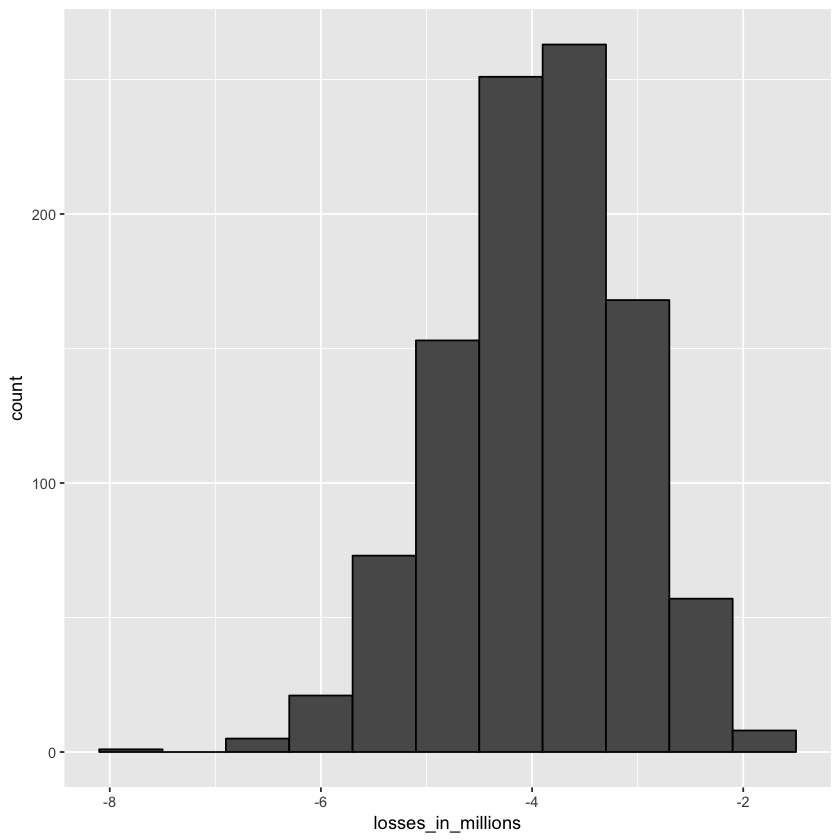

In [245]:
B <- 1000
losses <- replicate(B, {
    defaults <- sample(c(0,1), n, prob = c(1-p,p), replace = TRUE)
    sum(defaults * loss_per_foreclosure)
})


data.frame(losses_in_millions = losses/10^6) %>%
    ggplot(aes(losses_in_millions)) +
    geom_histogram(binwidth = 0.6, col="black")

You can see that we're going to lose money because of these people that default. And here's the distribution of how much money we're going to lose in millions. We don't really need a Monte Carlo simulation though.

Using what we've learned, the CLT tells us that because our losses are a **sum of independent draws, its distribution is approximately normal** with expected value and standard deviation given by the following formula.


In [246]:
#Expected Value
n*(p*loss_per_foreclosure + (1-p)*0)

#Standard Error
sqrt(n)*abs(loss_per_foreclosure)*sqrt(p*(1-p))

[1] -4e+06

[1] 885437.7

We can now set an interest rate to guarantee that on average, we
break even. Basically, we need to add a quantity `x` to each loan, which in this case are represented by draws, so that the **expected value** is zero. That means breaking even.

$lp + x(1-p) = 0$ where l is loss per foreclosure <br>
which gives us $ x = -lp/(1-p) $

If we define `l` to be the loss per foreclosure, we need to set `x` so that the following formula holds, which implies that `x` can be calculated using this R code, which gives us about 4,081. This is an interest rate of about `2%`.



In [247]:
-loss_per_foreclosure * p/(1-p)

cat("close to ",(4081/180000)*100, "%")

[1] 4081.633

close to  2.267222 %

We still have a problem though.

Although this interest rate guarantees that on average we break even, there's a 50% chance that we will lose money. If our bank loses money, we have to close it down. So we need to pick an interest rate that makes it unlikely for this to happen. At the same time, if the interest rate is too high our clients will go to another bank. So we must be willing to take some risks. So, let's they say that we want our chances of losing money to be `1 in 100`.

What does `x` have to be now? This one is a bit harder. We want the sum-- let's call it capital `S`-- to have the probability of S less than zero to be `0.01`. 

$Pr(S < 0) = 0.01$

We know that `S` is approximately normal. The expected value of `S` is given by this formula

$\{lp + x(1-p)\}n$


with `n` the number of draws, which in this case represents the number of loans. The standard error is given by this formula. 

$|x-l|\sqrt{np(1-p)}$

Because `x` is positive and `l` is negative, we know that the absolute value of x minus l is x minus l. Note that these are just the formulas we showed earlier, but using more compact symbols.

Now we're going to use a mathematical trick that is very common in statistics. We're going to add and subtract the same quantities to both sides of the event `S` less than zero so that the probability does not change, and we end up with a standard normal random variable on the left, which will then permit us to write down an equation with only x as an unknown. Here it goes.

We want the probability of `S` being less than zero to be `0.01`. 

$Pr(S < 0) = 0.01$

So what we're going to do now is we're going to subtract the expected value of `S` and divide by the standard error of `S` on both sides of the equation.

### $Pr\big( \frac{S - E[S]}{SE[S} < \frac{-E[S]}{SE[S} \big) = 0.01$

All we did was add and divide by the same quantity on both sides. We did this because now the term on the left is a standard normal random variable, which we will rename as capital `Z`. 


### $Pr\big( Z < \frac{-E[S]}{SE[S} \big) = 0.01$

Now, we will fill in the blanks with the actual formula for expected value and standard error.

## $\big( Z < \frac{-\{lp + x(1-p)\}n}{(x-1)\sqrt{np(l-p)}}\big) = 0.01$

The formula now looks like this. We have a `Z` on the left. That's good, that's going to make things easier later. The right looks complicated, but remember that `l`, `p`, and `n` are all known amounts, so eventually we'll
turn them into numbers.

Now, because the term on the left side is a normal random variable with expected value of zero and standard error one, it means that the quantity on the right must be equal to `qnorm` of `0.01`, which is negative `2.32`.



In [212]:
qnorm(0.01)

[1] -2.326348

Then the equation above will hold true. Remember that if we set little `z` to be `qnorm` `0.01`, this will give you a value of little `z` for which 
the following formula is true. 

$Pr(Z \leq z) = 0.01$

The probability of big `Z`, less than or equal to little `z`, equal `0.01`. So this means that the right side of the complicated equation must be equal to `qnorm` `0.01`.

So we have this formula. 

### $\frac{-\{lp + x(1-p)\}n}{(x-1)\sqrt{np(l-p)}} = z$

The trick works, because we end up with an expression containing `x` that we know has to be equal to an quantity depending on things we know. Solving for `x` is now simply, algebra.

## $x = -l \frac{np - z \sqrt{np(1-p)}}{N(1-p) + z\sqrt{(np(1-p)}}$



In [213]:
l <- loss_per_foreclosure
z <- qnorm(0.01)
x <- -l*(n*p - z*sqrt(n*(p*(1-p))))/(n*(1-p)+ z*sqrt(n*p*(1-p)))

x

cat("close to ",(x/180000)*100, "%")

[1] 6249.181

close to  3.471767 %

If we do it, we get that the `x` has to be about `6,249`, which is an interest rate of about `3%`, which is still pretty good. Note also that by choosing this interest rate, we now have an **expected profit per loan** of about \$2,124, which is a total expected profit of about \$2 million.
We can run a Monte Carlo simulation and check our theoretical approximation.


In [214]:
#Expected Value 
loss_per_foreclosure*p + x*(1-p)

[1] 2124.198

In [215]:
#Monte Carlo Simulation

B <- 1000

profit <- replicate(B, {
    draws <- sample(c(x, loss_per_foreclosure), n, prob = c(1-p, p), replace = TRUE)
    sum(draws)
    })

In [216]:
mean(profit)

[1] 2119866

In [217]:
#probability of profit being less than zero
mean(profit<0) 

[1] 0.012

We do that, and we indeed get that value again. And again, the probability of profit being less than zero according to the Monte Carlo simulation is about 1%.

### The Big Short

One of our employees points out that since the bank is making about \$2,000 per loan, that you should give out more loans. Why just `n`?

You explain that finding those `n` clients was hard. You need a group that is predictable, and that keeps the chances of defaults low. He then points out that even if the probability of default is higher, as long as your expected value is positive, you can minimize your chances of losing money
by increasing `n`, the number of loans, and relying on the law of large numbers.

He claims that even if the default rate is twice as high, say 4%, if we set the rate just a bit higher so that this happens, you will get a positive expected value. So if we set the interest rate at 5%, we are guaranteed a positive expected value of \$640 per loan. 

In [227]:
r <- 0.05
x <- r*180000

loss_per_foreclosure*p + x*(1-p)

[1] 4820

And we can minimize our chances of losing money by simply increasing the number of loans, since the probability of `S` being less than `0` is equal to the probability of `Z` being less than negative expected value of `S` divided by standard error `S`, with `Z` a standard normal random variable, as we saw earlier.

### $Pr(S < 0) = Pr\big( Z < \frac{-E[S]}{SE[S} \big) $

And if we do the math, we will see that we can pick an `n` so that this probability is 1 in 100. Let's see how.

If we define $\mu$ and $\sigma$ to be the expected value and standard deviation of the earn, that is of a single loan, we have that using the formulas above, `E[S]`, the expected value of `S`, is `n` times $\mu$. And the standard error of `S` is the square root of `n` times $\sigma$. 

#### $E[S] = n\mu$
#### $SE[S] = \sqrt{n}\sigma$


So if we define little `z` to be the `qnorm` of 0.01, we have the following formula

### $ - \frac{n\mu}{\sqrt{n}\sigma} = - \frac{\sqrt{n}\mu}{\sigma} = z$



which tells us that if `n` is bigger than `z` squared times $\sigma$ squared divided by$\mu$ squared, we are guaranteed to have a probability of less than 0.01 of losing money.

### $n \geq z^2\sigma^2 / \mu^2$

The implication is that as long as $\mu$, the expected value, is positive,
we can find an `n`, a number of loans, that minimizes the probability of a loss. This is a form of the Law of Large Numbers. When `n` is large, our average earning per loan converges to the expected earning, $\mu$.
With `x` fixed, now we can ask what `n` do we need for the probability to be 0.01?

In our example, we use the following formula. 



In [228]:
z <- qnorm(0.01)
n <- ceiling((z^2*(x-l)^2*p*(1-p))/(l*p + x*(1-p))^2)

n

[1] 200

In [229]:
n*(loss_per_foreclosure*p + x * (1-p))

[1] 964000

And we get that `n` has to be 22,163 loans. This is the number of loans we need so that our probability of losing is about 1%. And furthermore, we are expected to earn a total of about \$14 million. We can confirm this with a Monte Carlo simulation. We run the Monte Carlo simulation, and we get the probability of losing money is about 1%. This seems like a no brainer.



In [230]:
p <- 0.04
x <- 0.05*180000

profit <- replicate(B, {
    draws <- sample(c(x, loss_per_foreclosure), n, prob = c(1-p,p), replace = TRUE)
    sum(draws)
})

mean(profit <0)

[1] 0.406

Your colleague decides to leave your bank, and start his own high-risk mortgage company. A few months later, your colleague's bank has gone bankrupt. A book is written about it and eventually, a movie made relating to the mistake your friend and many others made. What happened? Your friend's scheme was based in part on the following mathematical formula--
by making `n` large, we minimize the standard error of our per-loan profit.

$SE[(X_1 + X_2 + \dots + X_n)/n] = \sigma/\sqrt{n}$

However, for this rule to hold, <u>the `X's` must be independent draws</u>. </u>The fact that one person defaults must be independent of other people defaulting</u>. Note that, for example, that in the extreme of averaging the same event over and over, an event is certainly not independent. In that case, we get a much higher standard error. It's the square root of `n` larger.

To construct a more realistic simulation than the original one your friend ran, let's assume there could be a global event that affects everybody with high-risk mortgages, and changes their probability. We will assume that with a 50-50 chance, all the probabilities go up or down slightly to somewhere between 0.03 and 0.05. But it happens to everybody at once, not just one person. These draws are no longer independent.

Let's use a Monte Carlo simulation to see what happens under this model. 

In [234]:
p <- 0.04
x <- 0.05*180000

profit <- replicate(B, {
    new_p <- 0.04 + sample(seq(-0.01, 0.01, length = 100), 1)
    draws <- sample(c(x, loss_per_foreclosure), n, prob = c(1-new_p, new_p), replace =  TRUE)
    sum(draws)
})

mean(profit)

mean(profit<0)

mean(profit < -10000000)

[1] 97486

[1] 0.422

[1] 0

Note that our expected profit is still large. We're expected to make about \$14 million. However, the probability of the bank having negative earning
shoots way up to almost 35%. Even scarier is the probability of losing more than $10 million, which is 24%. To understand how this happens, we can look at the distribution of our random variable.

<img src="5.png">

It doesn't look normal at all. The theory completely breaks down, and our random variable has much more variability than expected.

The financial meltdown of 2007 was due, among other things, <u>to financial experts assuming independence when there was none</u>.

### Exercise 1. Bank earnings

Say you manage a bank that gives out 10,000 loans. The default rate is 0.03 and you lose $200,000 in each foreclosure.

Create a random variable S that contains the earnings of your bank. Calculate the total amount of money lost in this scenario.

* Using the `sample` function, generate a vector called `defaults` that contains `n` samples from a vector of `c(0,1)`, where `0` indicates a payment and `1` indicates a default
* Multiply the total number of defaults by the loss per foreclosure.

In [257]:
# Assign the number of loans to the variable `n`

n <- 10000

# Assign the loss per foreclosure to the variable `loss_per_foreclosure`
loss_per_foreclosure <- -200000

# Assign the probability of default to the variable `p_default`

p_default = 0.03

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Generate a vector called `defaults` that contains the default outcomes of `n` loans

defaults <- sample(c(0, 1), n, prob = c(1-p_default, p_default), replace = TRUE)

# Generate `S`, the total amount of money lost across all foreclosures. Print the value to the console.

S <- sum(defaults * loss_per_foreclosure)
S

[1] -6.3e+07

### Exercise 2. Bank earnings Monte Carlo

Run a Monte Carlo simulation with 10,000 outcomes for S, the sum of losses over 10,000 loans. Make a histogram of the results.

* Given the probability of default, use the function `sample` to generate a list of 10,000 loan outcomes: payment (0) or default (1).
* Given the cost of each default, use the function `sum` to return the sum of all losses across the 10,000 loans.
* Repeat the previous steps a total of 10,000 times.
* Plot the histogram of values using the function `hist`.

In [265]:
# Assign the number of loans to the variable `n`
n <- 10000

# Assign the loss per foreclosure to the variable `loss_per_foreclosure`
loss_per_foreclosure <- -200000

# Assign the probability of default to the variable `p_default`
p_default <- 0.03

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# The variable `B` specifies the number of times we want the simulation to run
B <- 10000

# Generate a list of summed losses 'S'. Replicate the code from the previous exercise over 'B' iterations to generate a list of summed losses for 'n' loans

S <- replicate(B, {
    defaults <- sample(c(0,1), n, prob = c(1-p_default, p_default), replace = TRUE)
    sum(defaults * loss_per_foreclosure)
})

sum(S)


[1] -6.00264e+11

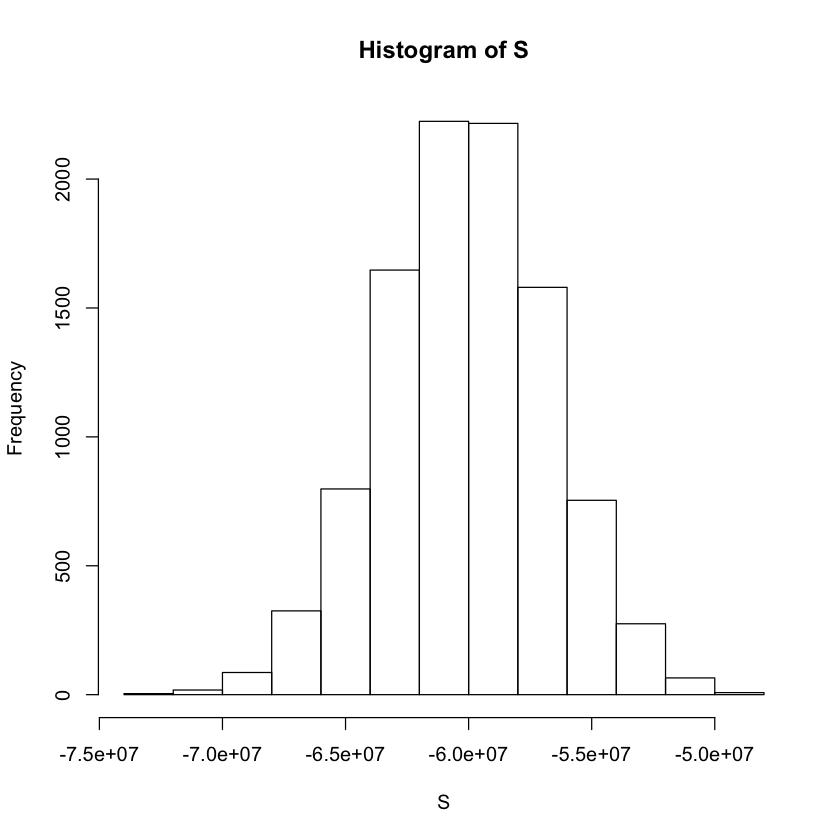

In [267]:
hist(S)

### Exercise 3. Bank earnings expected value

What is the expected value of S, the sum of losses over 10,000 loans? For now, assume a bank makes no money if the loan is paid.

* Using the chances of default (p_default), calculate the expected losses over 10,000 loans.

In [268]:
# Assign the number of loans to the variable `n`
n <- 10000

# Assign the loss per foreclosure to the variable `loss_per_foreclosure`
loss_per_foreclosure <- -200000

# Assign the probability of default to the variable `p_default`
p_default <- 0.03

# Calcualte the expected loss due to default out of 10,000 loans
n*loss_per_foreclosure*p_default

[1] -6e+07

### Exercise 4. Bank earnings standard error

What is the standard error of S ?

* Compute the standard error of the random variable `S` you generated in the previous exercise, the summed outcomes of 10,000 loans.

In [271]:
# Assign the number of loans to the variable `n`
n <- 10000

# Assign the loss per foreclosure to the variable `loss_per_foreclosure`
loss_per_foreclosure <- -200000

# Assign the probability of default to the variable `p_default`
p_default <- 0.03

# Compute the standard error of the sum of 10,000 loans
sqrt(n)*abs(loss_per_foreclosure)*sqrt(p_default * (1-p_default))

[1] 3411744

### Exercise 5. Bank earnings interest rate - 1

So far, we've been assuming that we make no money when people pay their loans and we lose a lot of money when people default on their loans. Assume we give out loans for \$180,000. How much money do we need to make when people pay their loans so that our net loss is \$0?

In other words, what interest rate do we need to charge in order to not lose money?

* If the amount of money lost or gained equals 0, the probability of default times the total loss per default equals the amount earned per probability of the loan being paid.
* Divide the total amount needed per loan by the loan amount to determine the interest rate.

In [275]:
# Assign the loss per foreclosure to the variable `loss_per_foreclosure`
loss_per_foreclosure <- -200000

# Assign the probability of default to the variable `p_default`
p_default <- 0.03

# Assign a variable `x` as the total amount necessary to have an expected outcome of $0
x <- -loss_per_foreclosure*p_default/(1-p_default)
x
# Convert `x` to a rate, given that the loan amount is $180,000. Print this value to the console.
x/180000

[1] 6185.567

[1] 0.03436426

### Exercise 6. Bank earnings interest rate - 2

With the interest rate calculated in the last example, we still lose money 50% of the time. What should the interest rate be so that the chance of losing money is 1 in 20?

In math notation, what should the interest rate be so that Pr(S<0)=0.05 ?

Remember that we can add a constant to both sides of the equation to get:

$Pr\big(\frac{S-E[S]}{SE[S]} < \frac{-E[S]}{SE[S]}\big)$

which is

$Pr\big(Z < \frac{-[lp + x(1-p)]n}{(x-1)\sqrt{np(1-p)}}\big) = 0.05$

Let `z = qnorm(0.05)` give us the value of `z` for which:

$Pr(Z \leq z) = 0.05$

* Use the `qnorm` function to compute a continuous variable at given quantile of the distribution to solve for `z`.
* In this equation, l, p , and n are known values. Once you've solved for `z`, solve for `x`.
* Divide `x` by the loan amount to calculate the rate.



In [281]:
# Assign the number of loans to the variable `n`
n <- 10000

# Assign the loss per foreclosure to the variable `loss_per_foreclosure`
loss_per_foreclosure <- -200000

# Assign the probability of default to the variable `p_default`
p_default <- 0.03

# Generate a variable `z` using the `qnorm` function
z <- qnorm(0.05)
print(z)
# Generate a variable `x` using `z`, `p_default`, `loss_per_foreclosure`, and `n`

x <- -loss_per_foreclosure*(n*p_default - z*sqrt(n*(p_default*(1-p_default))))/(n*(1-p_default)+ z*sqrt(n*p_default*(1-p_default)))
print(x)
# Convert `x` to an interest rate, given that the loan amount is $180,000. Print this value to the console.
x/180000

[1] -1.644854
[1] 6783.728


[1] 0.03768738

### Exercise 7. Bank earnings - minimize money loss

The bank wants to minimize the probability of losing money. Which of the following achieves their goal without making interest rates go up?

A: A reduced default rate



<a id="5"></a>
# Stats Review
[Top](#top)

** Cumulative Distribution Function (CDF) ** will give us the probability that a random variable is less than or equal to a certain real numner. 

$P(X \leq x)$

** Probability Mass Function (PMF) ** will give us probability that a `discrete` random variable is exactly equal to some real value.

$P(X = x)$

** Probability Density Function (PDF) ** of a random varibale `X` when integrated over a set of real numbers `A` will give the probability that `X`lies in `A`. This gives us relative probability. 